# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [condensed data](#toc1_1_)    
  - [🕹️ interactive](#toc1_2_)    
  - [descriptive stats](#toc1_3_)    
  - [slides](#toc1_4_)    
    - [slide 1](#toc1_4_1_)    
    - [slide 2](#toc1_4_2_)    
    - [slide 3](#toc1_4_3_)    
    - [slide 4](#toc1_4_4_)    
    - [slide 5](#toc1_4_5_)    
    - [slide 6](#toc1_4_6_)    
    - [slide 7](#toc1_4_7_)    
    - [slide 8](#toc1_4_8_)    
    - [slide 9](#toc1_4_9_)    
    - [slide 10](#toc1_4_10_)    
    - [bonus - ci](#toc1_4_11_)    
  - [2025-03-18](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

con = ddb.connect()

🐍 3.12.2 | 📦 pygwalker: 0.4.9.14 | 📦 pandas: 2.2.3 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.2.1 | 📦 pandas-plots: 0.12.22 | 📦 connection_helper: 0.8.15


## <a id='toc1_1_'></a>[condensed data](#toc0_)
- defined columns have been transformed

🔵 *** df: condensed ***  
🟣 shape: (195, 34) columns: ['[01.01] CTCAE' '[01.02] Date' '[01.03] Exercise-related' '[02.02] Type'
 '[02.03] Trigger' '[02.04] Affected body parts' '[03.01] Pain'
 '[03.02]  With hospitalization' '[03.03] Medical follow-up treatment'
 '[03.04] With delayed therapy protocol'
 '[03.05] Life-saving intervention' '[03.06] Increased care needs'
 '[03.07] With medication administration' '[03.08.01] Affected person'
 '[03.08] Occurrence of fear and uncertainty'
 '[03.09] Structural adjustment' '[03.10.01] Approver'
 '[03.10.02] OK to proceed'
 '[03.10] Assessment of the situation by expertise'
 '[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)'
 '[03.12] With observation' '[03.13.01] Stop or Break' '[03.13] Stop'
 '[03.14] Adaptations' '[03.16] Death' '[05.01] Therapy phase'
 '[05.02] Group size' '[05.03] Age' '[05.04] Online'
 '[05.05] As part of testing' '[05.06] Setting' '[05.07] Main motor skill'
 '[05.08] Time point' '[05.09] Training conditi

[01.01] CTCAE      [01.02] Date [01.03] Exercise-related  \
0             2   Already present                       No   
1             1  First occurrence                      Yes   
2             2   Already present                       No   

           [02.02] Type                  [02.03] Trigger  \
0       Nausea/Vomiting  Physical strain|Medical therapy   
1                  Pain            Coordination problems   
2  Circulatory problems                  Medical therapy   

  [02.04] Affected body parts [03.01] Pain [03.02]  With hospitalization  \
0      Internal medicine type         Nein                            No   
1               Back|Buttocks           Ja                            No   
2      Internal medicine type         Nein                            No   

  [03.03] Medical follow-up treatment [03.04] With delayed therapy protocol  \
0                                  No                                    No   
1                                  No                                    No   
2                                 Yes                                    No   

   ... [03.16] Death [05.01] Therapy phase [05.02] Group size     [05.03] Age  \
0  ...            No         Acute therapy         Individual  10 to 14 years   
1  ...            No         Acute therapy         Individual    6 to 9 years   
2  ...            No         Acute therapy         Individual  10 to 14 years   

  [05.04] Online [05.05] As part of testing    [05.06] Setting  \
0             No                         No  Hospital corridor   
1             No                         No  Hospital corridor   
2             No                         No      Patients room   

  [05.07] Main motor skill [05.08] Time point [05.09] Training condition  
0             Coordination      2. Time point                    Average  
1             Coordination      1. Time point                       Good  
2             Coordination      2. Time point                   Moderate  

[3 rows x 34 columns]

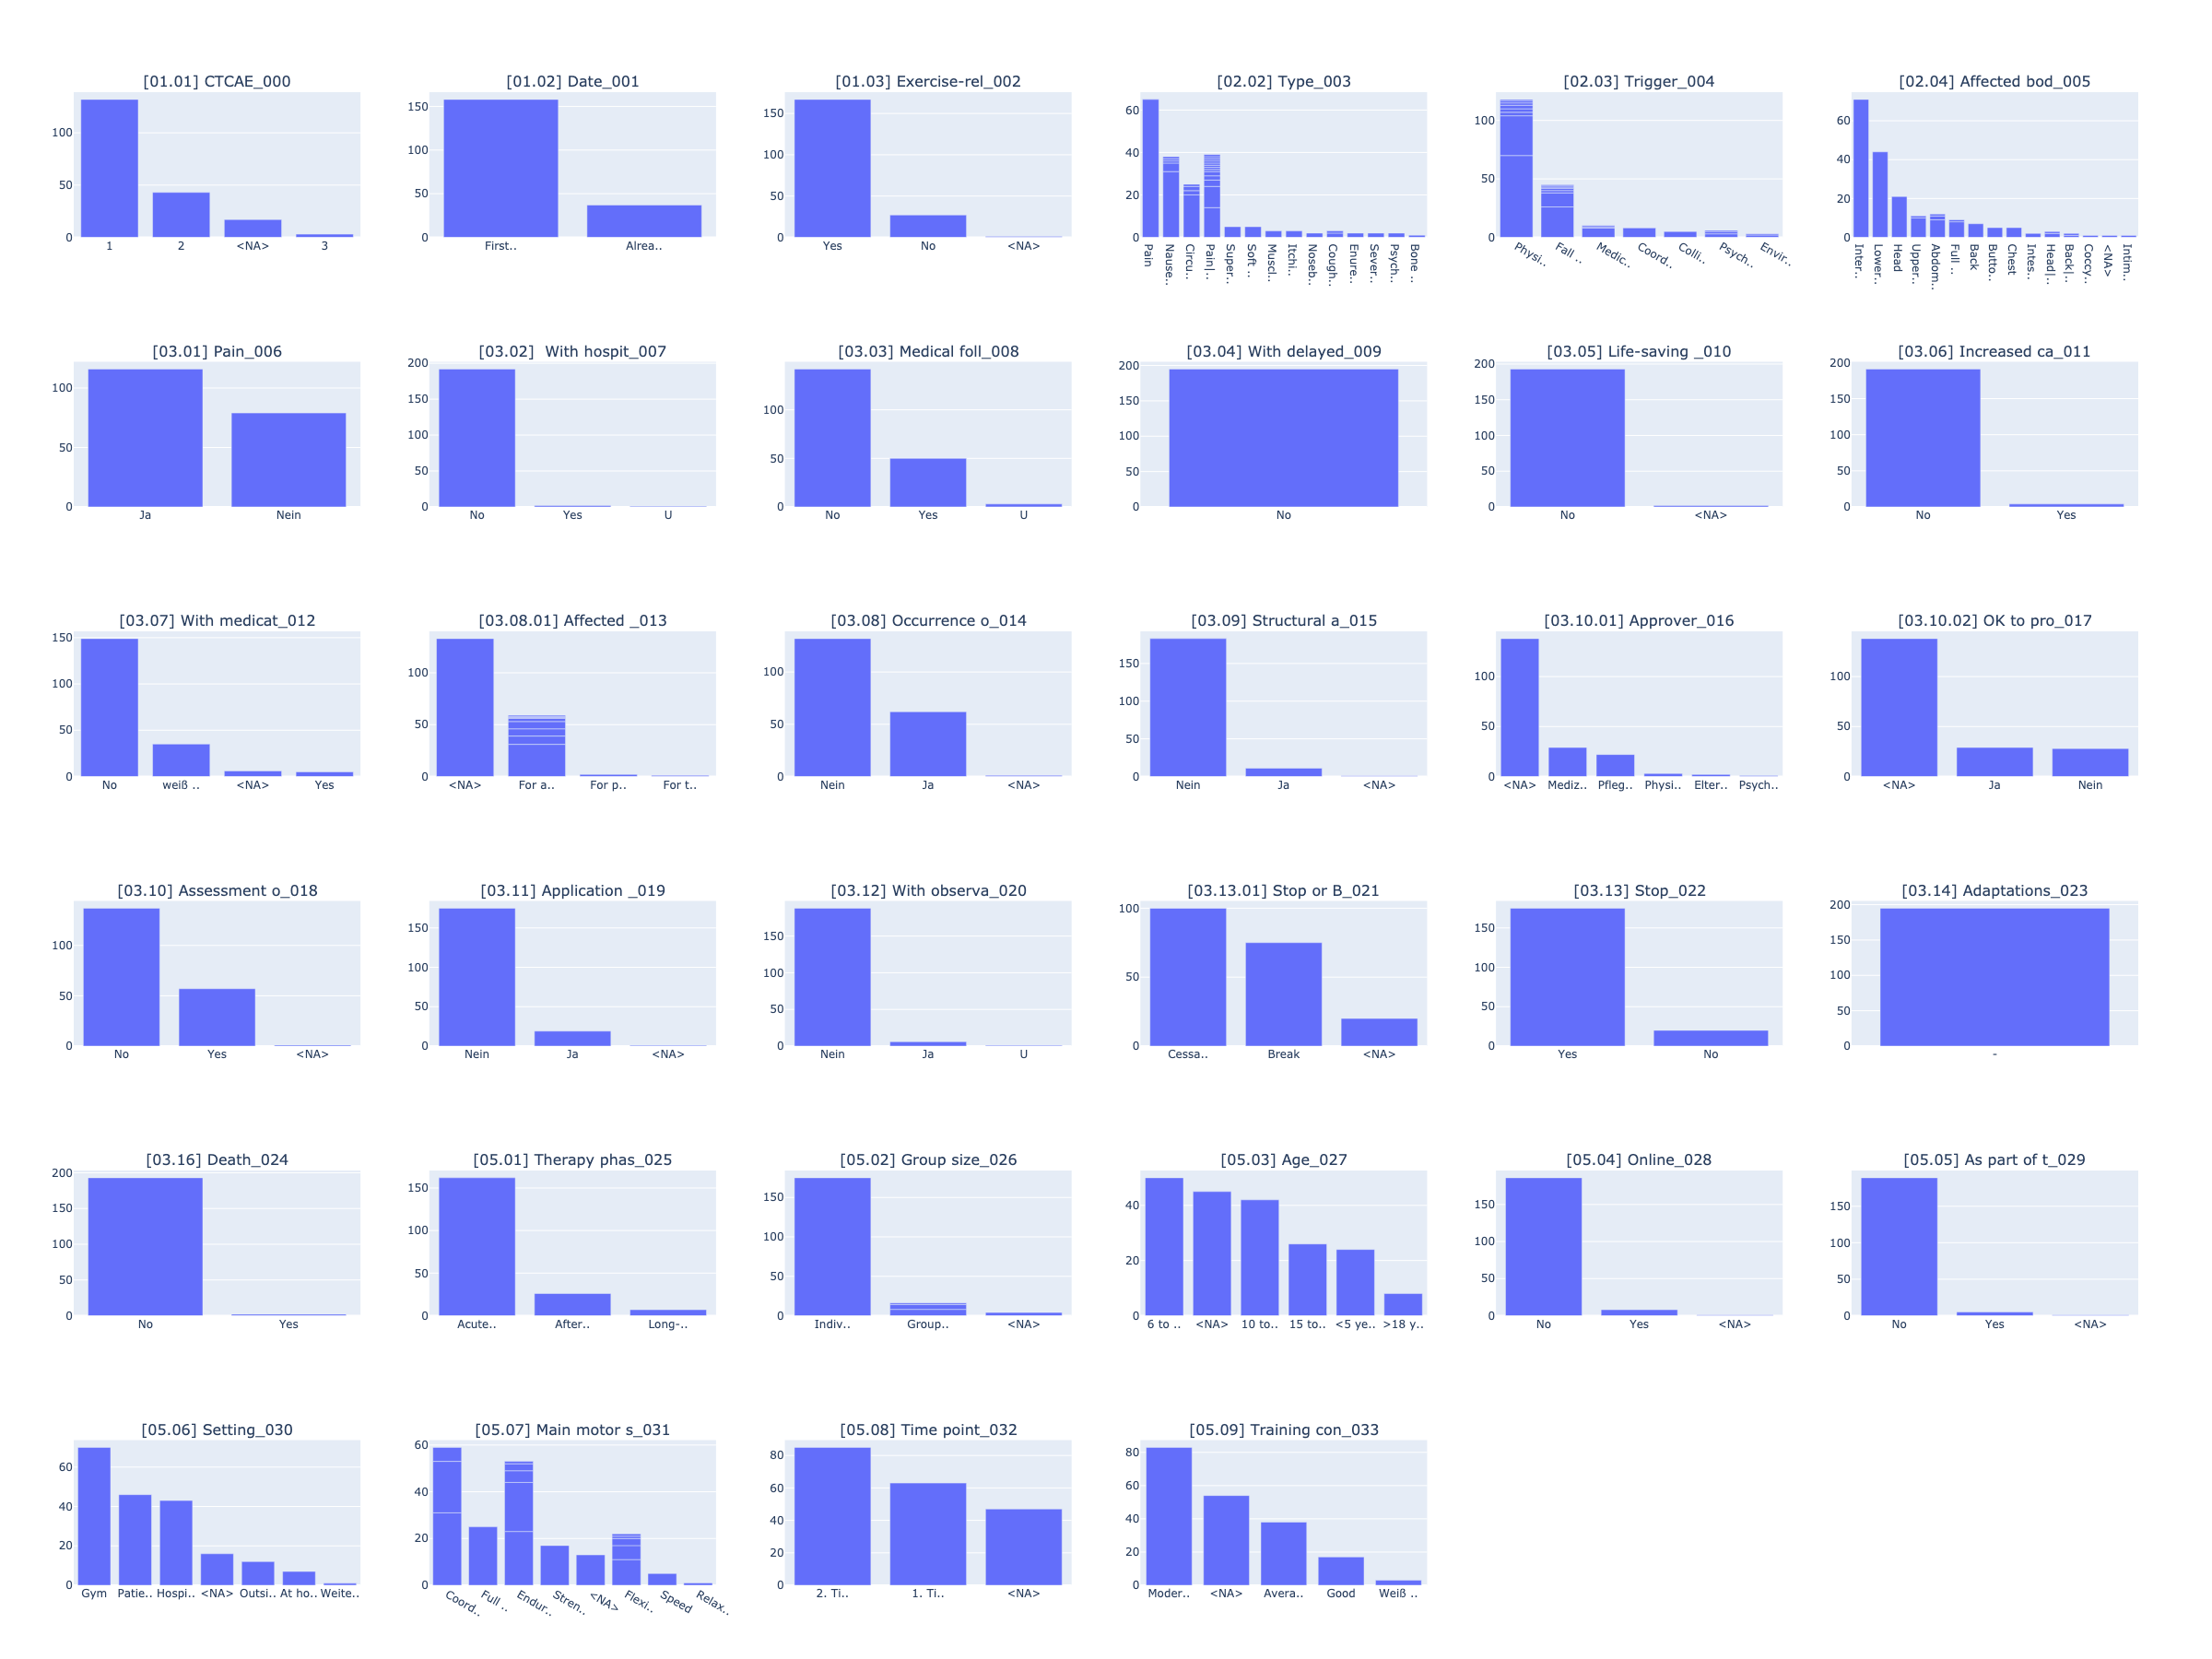

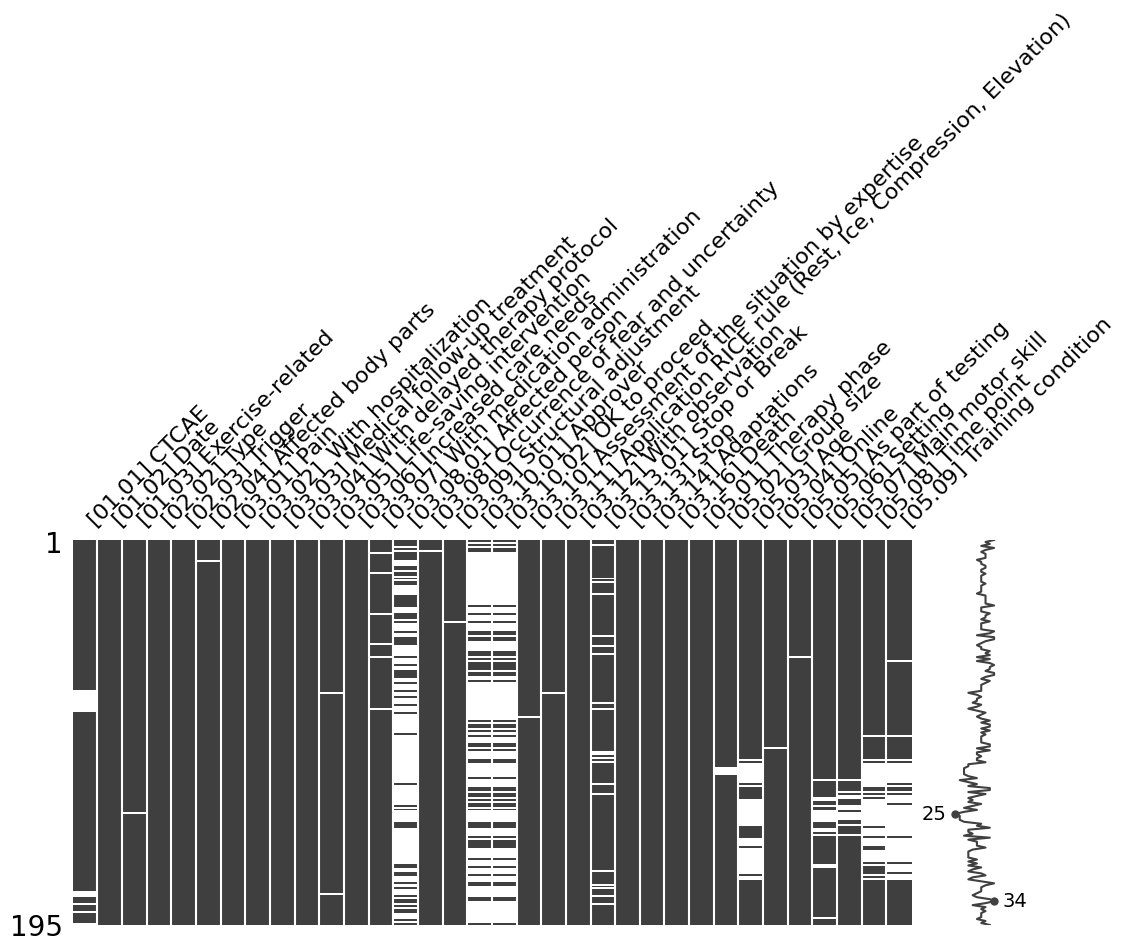

In [2]:
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    )
)

# * CTCAE should be a string with integer values and MUST have <NA> as NA
df_csv_condensed["[01.01] CTCAE"] = (df_csv_condensed["[01.01] CTCAE"]
        .astype("Int64")
        .astype(str)
        .replace("<NA>", pd.NA)
)

# * mark columns that should be str instead of float, fuzzy
# col_int = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# df_csv_condensed = df_csv_condensed.astype({col_int[0]: "Int64"}).astype(
#     {col_int[0]: str}
# )


tbl.describe_df(
    df_csv_condensed,#.iloc[:, [13]],
    "condensed",
    top_n_uniques=5,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_2_'></a>[🕹️ interactive](#toc0_)

In [3]:
if False:
    import pygwalker as pyg 
    
    _df = df_csv_condensed.astype(str)#.sort_index(axis=1)

    _=pyg.walk(
        dataset=_df,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

## <a id='toc1_3_'></a>[descriptive stats](#toc0_)

In [4]:
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.08.01]",
        "[03.08.02]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)

# * get all columns
# cols = df_csv_condensed.columns
cols

['[01.01] CTCAE',
 '[01.02] Date',
 '[01.03] Exercise-related',
 '[02.02] Type',
 '[02.03] Trigger',
 '[02.04] Affected body parts',
 '[03.02]  With hospitalization',
 '[03.03] Medical follow-up treatment',
 '[03.04] With delayed therapy protocol',
 '[03.06] Increased care needs',
 '[03.07] With medication administration',
 '[03.08] Occurrence of fear and uncertainty',
 '[03.08.01] Affected person',
 '[03.09] Structural adjustment',
 '[03.10] Assessment of the situation by expertise',
 '[03.10.01] Approver',
 '[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)',
 '[03.12] With observation',
 '[03.13] Stop',
 '[03.13.01] Stop or Break',
 '[03.14] Adaptations',
 '[05.01] Therapy phase',
 '[05.02] Group size',
 '[05.03] Age',
 '[05.04] Online',
 '[05.05] As part of testing',
 '[05.06] Setting',
 '[05.07] Main motor skill',
 '[05.08] Time point',
 '[05.09] Training condition']

In [5]:
# # ! remove rows with missing CTCAE
df_csv_condensed = df_csv_condensed[df_csv_condensed['[01.01] CTCAE'].notna()]

In [6]:
# n = len(df_csv_condensed)

# for col in cols:
#     if df_csv_condensed[col].dtype.kind in ("O"):
#         df = (df_csv_condensed[col]
#             .str.split("|")
#             .explode()
#             .value_counts()
#             .to_frame()
#             .rename(columns={"count": "cnt"})
#             .assign(pct=lambda x: x["cnt"] / n)
#             .round({"pct": 2})
#         )
#         con.from_df(df.reset_index()).show()


In [7]:
# # * loop over all selected columns
import dis
from matplotlib.pylab import f


for col in cols[:]:

    # * skip CTCAE and columns that are not str
    if col != "[01.01] CTCAE" and df_csv_condensed[col].dtype.kind in ("O"):

        # * slice
        df = df_csv_condensed[[col, "[01.01] CTCAE"]].dropna().copy()
        # print(col)
        df.iloc[:,0]= df.iloc[:,0].str.strip()#.str.ljust(70, fillchar=".")

        # * split to create arrays in cells, then explode to have atomic values
        df[col] = df[col].str.split("|")
        df = df.explode(col)

        # todo descending order
        # * to pivot
        _ =(
            tbl.pivot_df(
                df=df.sort_values(df.columns[-1], ascending=False),
                dropna=False,
                data_bar_axis="x",
                col1_width=600,
            )
            # .format(lambda x: f"{x}")
        )
        display(_)
        # display(
        #     tbl.pivot_df(
        #         df=df,
        #         dropna=False,
        #         data_bar_axis="x",
        #     )
        # )

## <a id='toc1_4_'></a>[slides](#toc0_)

In [8]:
def create_multi_chart(df_):
    df = df_.copy()
    df.iloc[:,0] = df.iloc[:,0].str.split("|")
    df.iloc[:,1] = df.iloc[:,1].str.split("|")
    df = df.explode(df.columns[0]).explode(df.columns[1])
    
    _=(df
        .plot_stacked_bars(
            swap = True,
            top_n_index = 5,
            sort_values_index=True,
            top_n_color = 5,
            sort_values_color=True,
            relative = True,
            height=800,
            # * this adds a remark to chart title. only use on small subsets
            dropna=True,
            # show_other=True,
        )
    )
    
    display(tbl.pivot_df(df, pct_axis="x", data_bar_axis="x", heatmap_axis=""))
    
    _ = pls.plot_stacked_bars(
        df=df_,
        swap=True,
        height=800,
        top_n_index=5,
        sort_values_index=True,
        top_n_color=5,
        sort_values_color=True,
        relative=True,
        dropna=True,
        # show_other=True,
    )
    
    return

In [9]:
# # * apply filter if needed
df_slides = (df_csv_condensed
    # [
    #     df_csv_condensed['[01.01] CTCAE'].notna()
    # ]
    .copy()
)

### <a id='toc1_4_1_'></a>[slide 1](#toc0_)

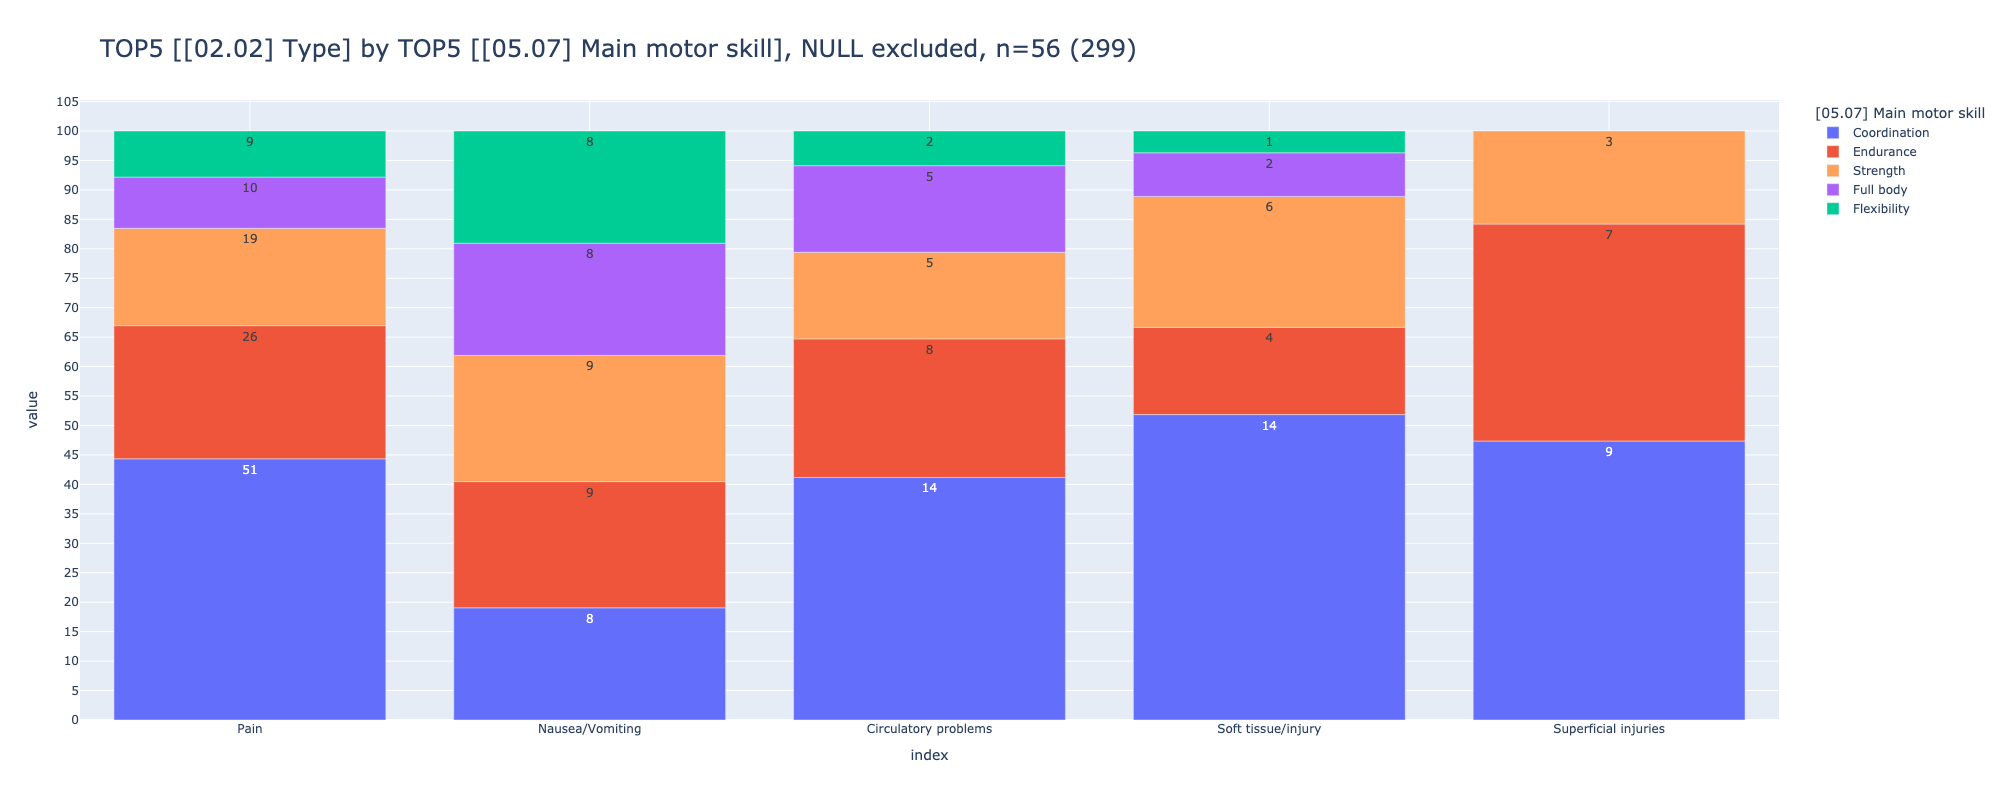

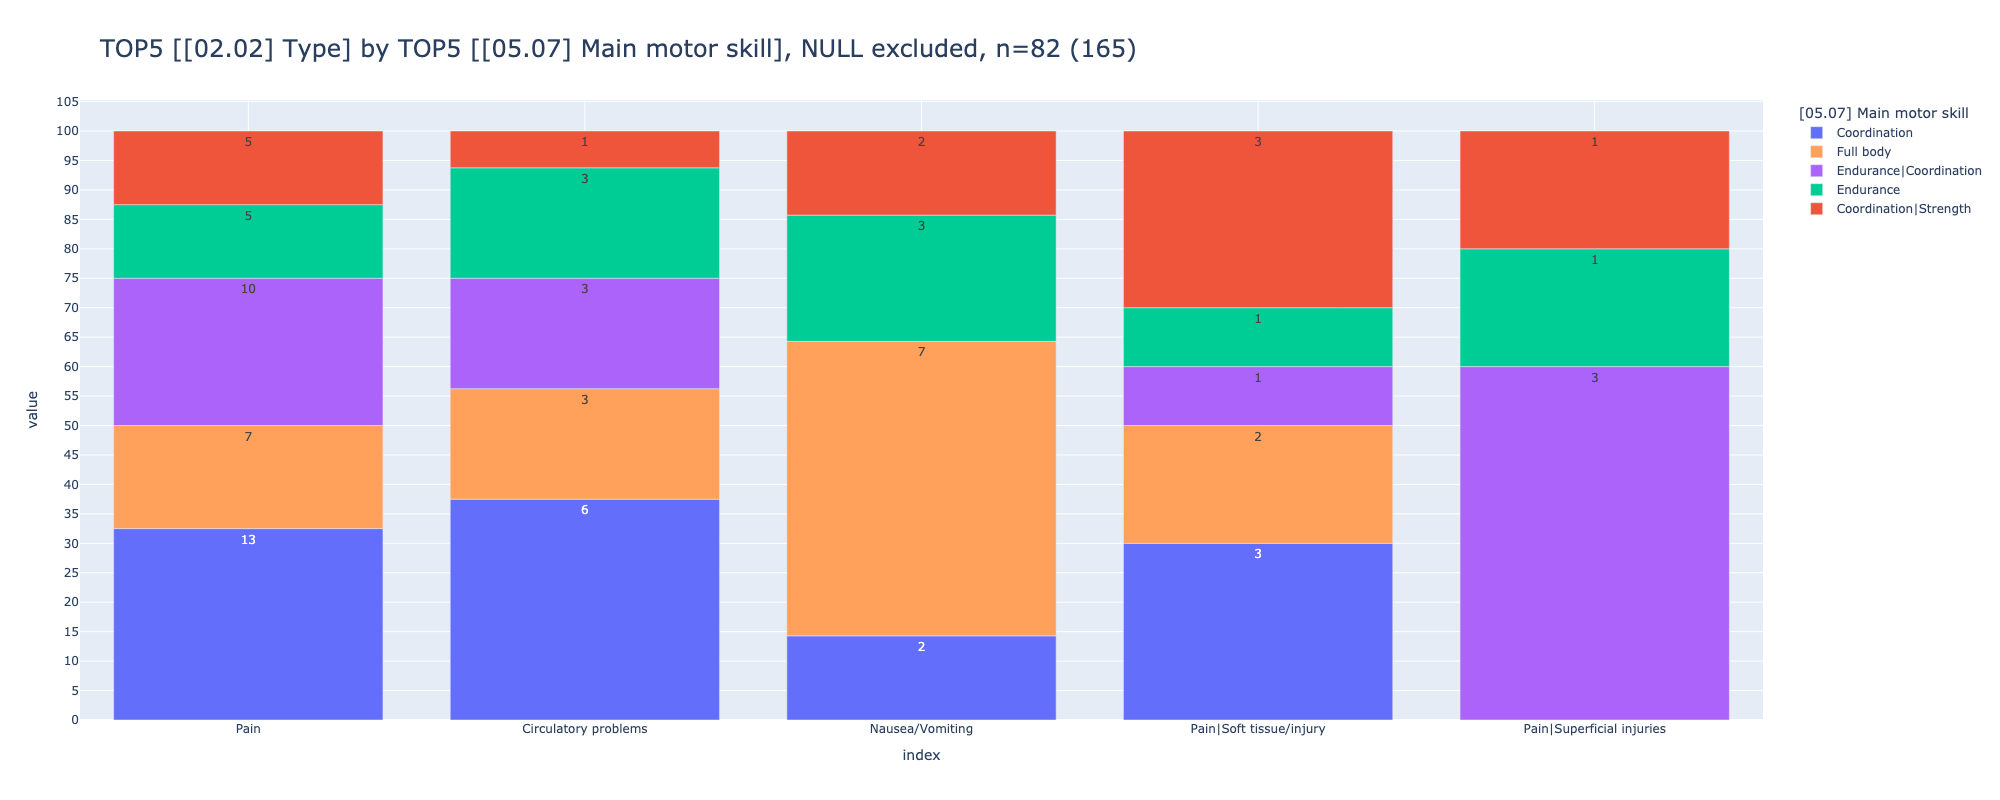

In [10]:
slide1=df_slides.find_cols(["[05.07]","[02.02]"])
create_multi_chart(df_slides[slide1])

### <a id='toc1_4_2_'></a>[slide 2](#toc0_)

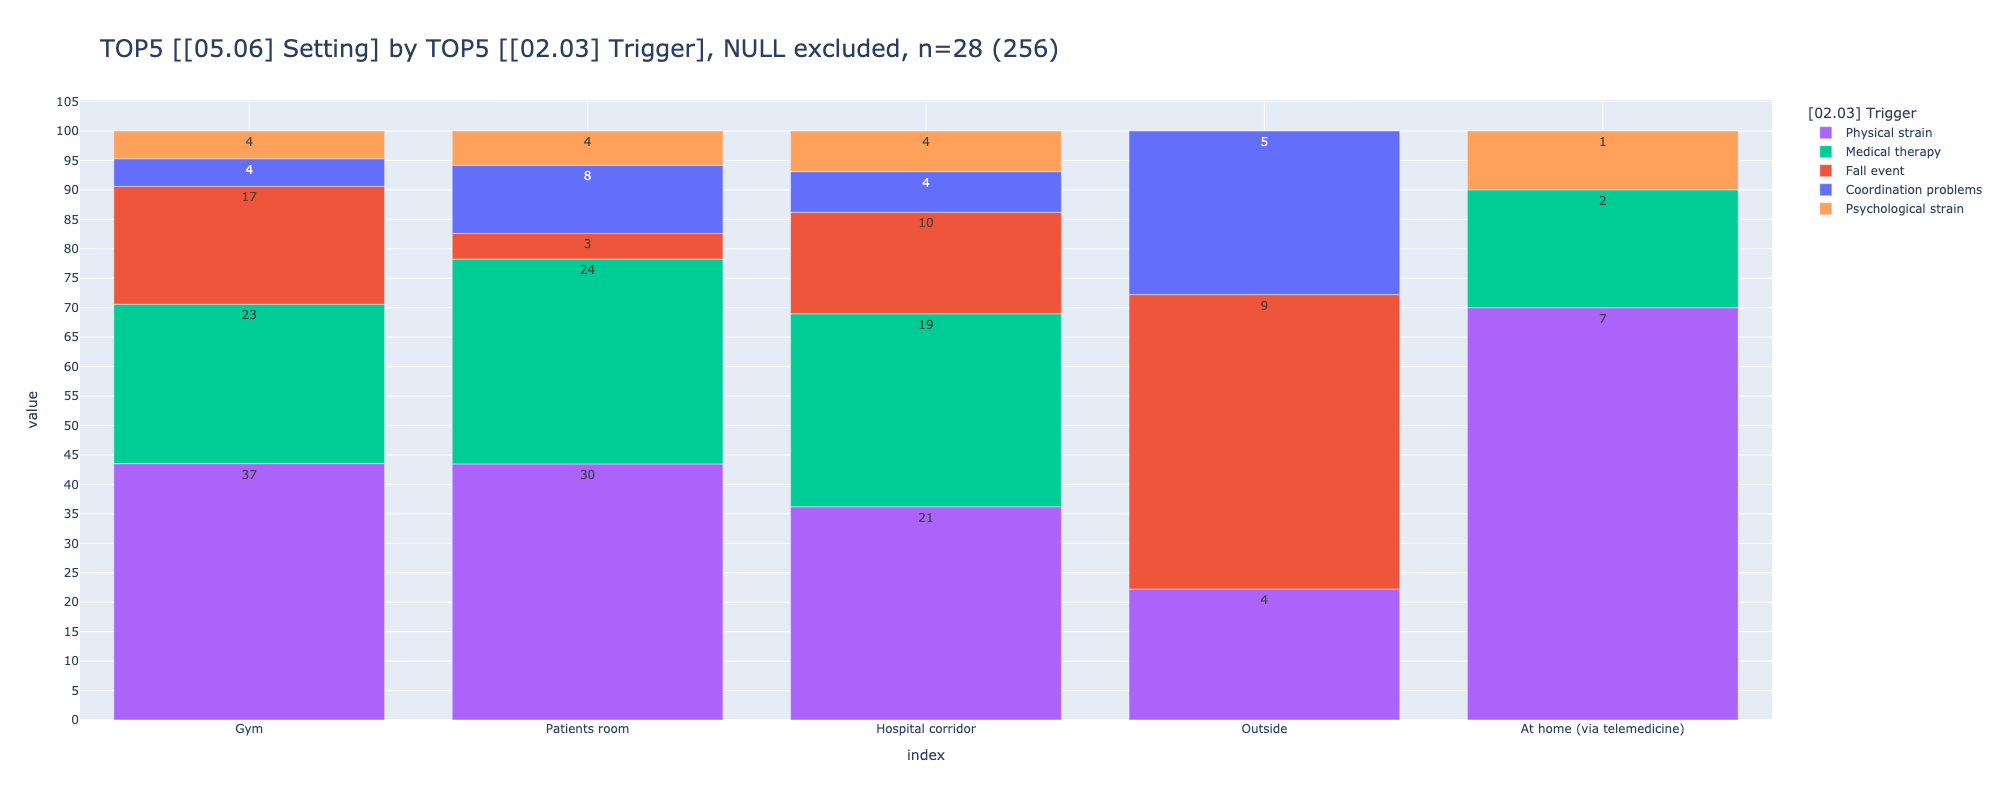

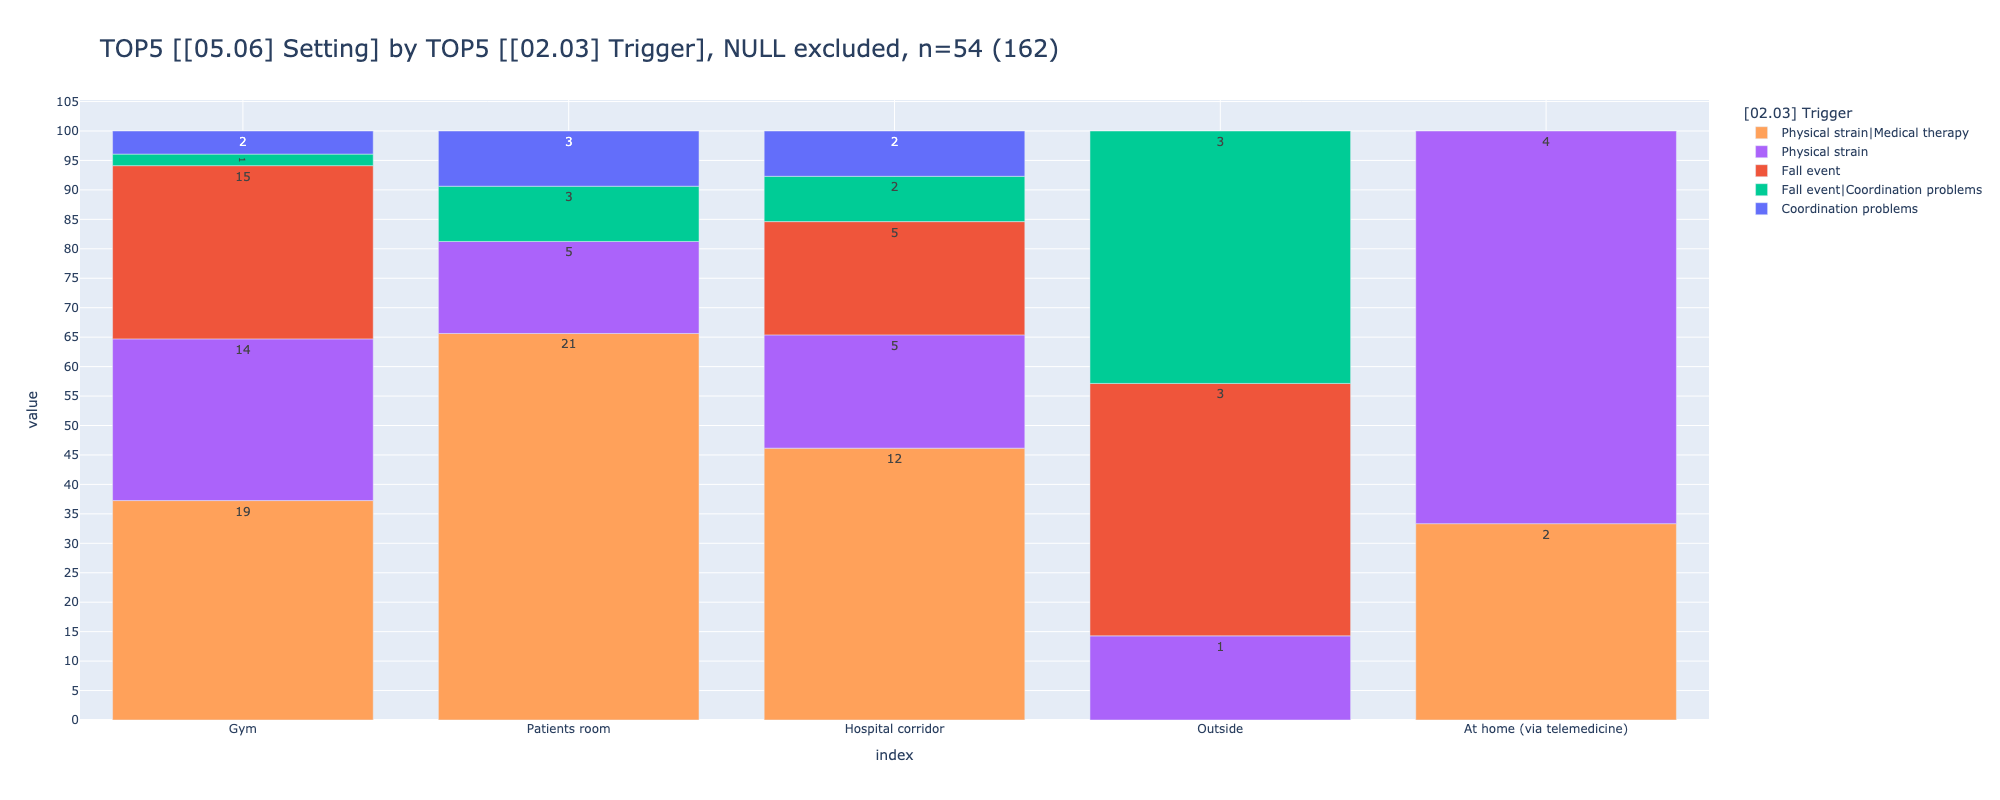

In [11]:
slide2=df_slides.find_cols([
    "[02.03]",
    "[05.06]",
    ])
create_multi_chart(df_slides[slide2])

### <a id='toc1_4_3_'></a>[slide 3](#toc0_)

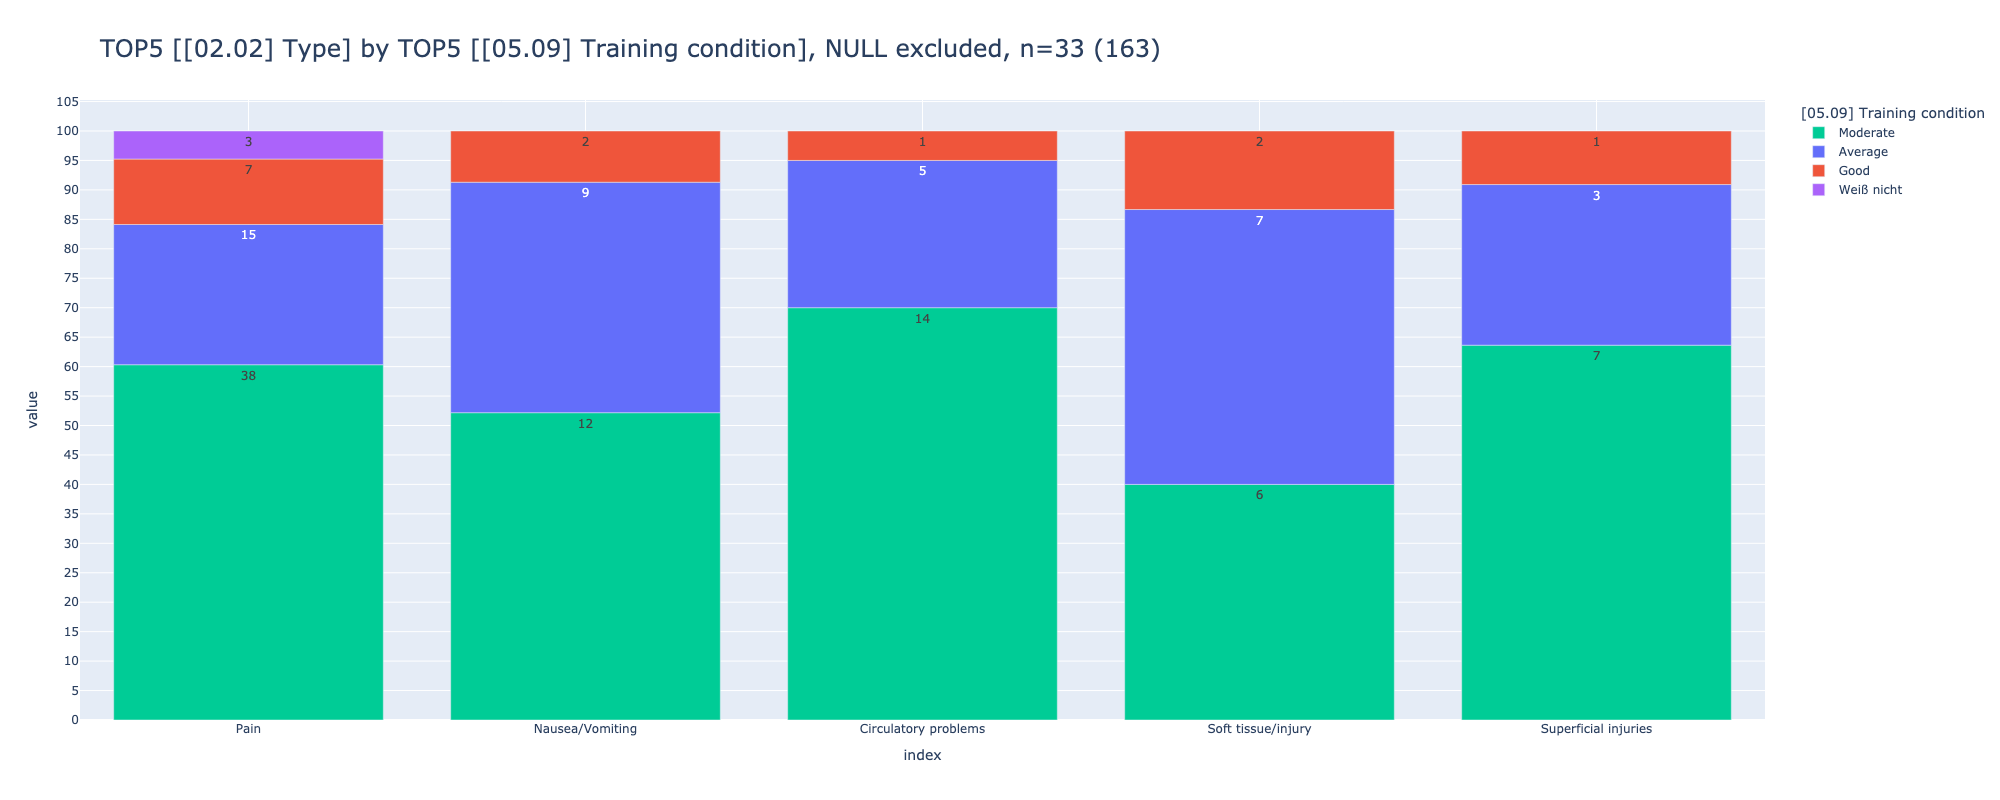

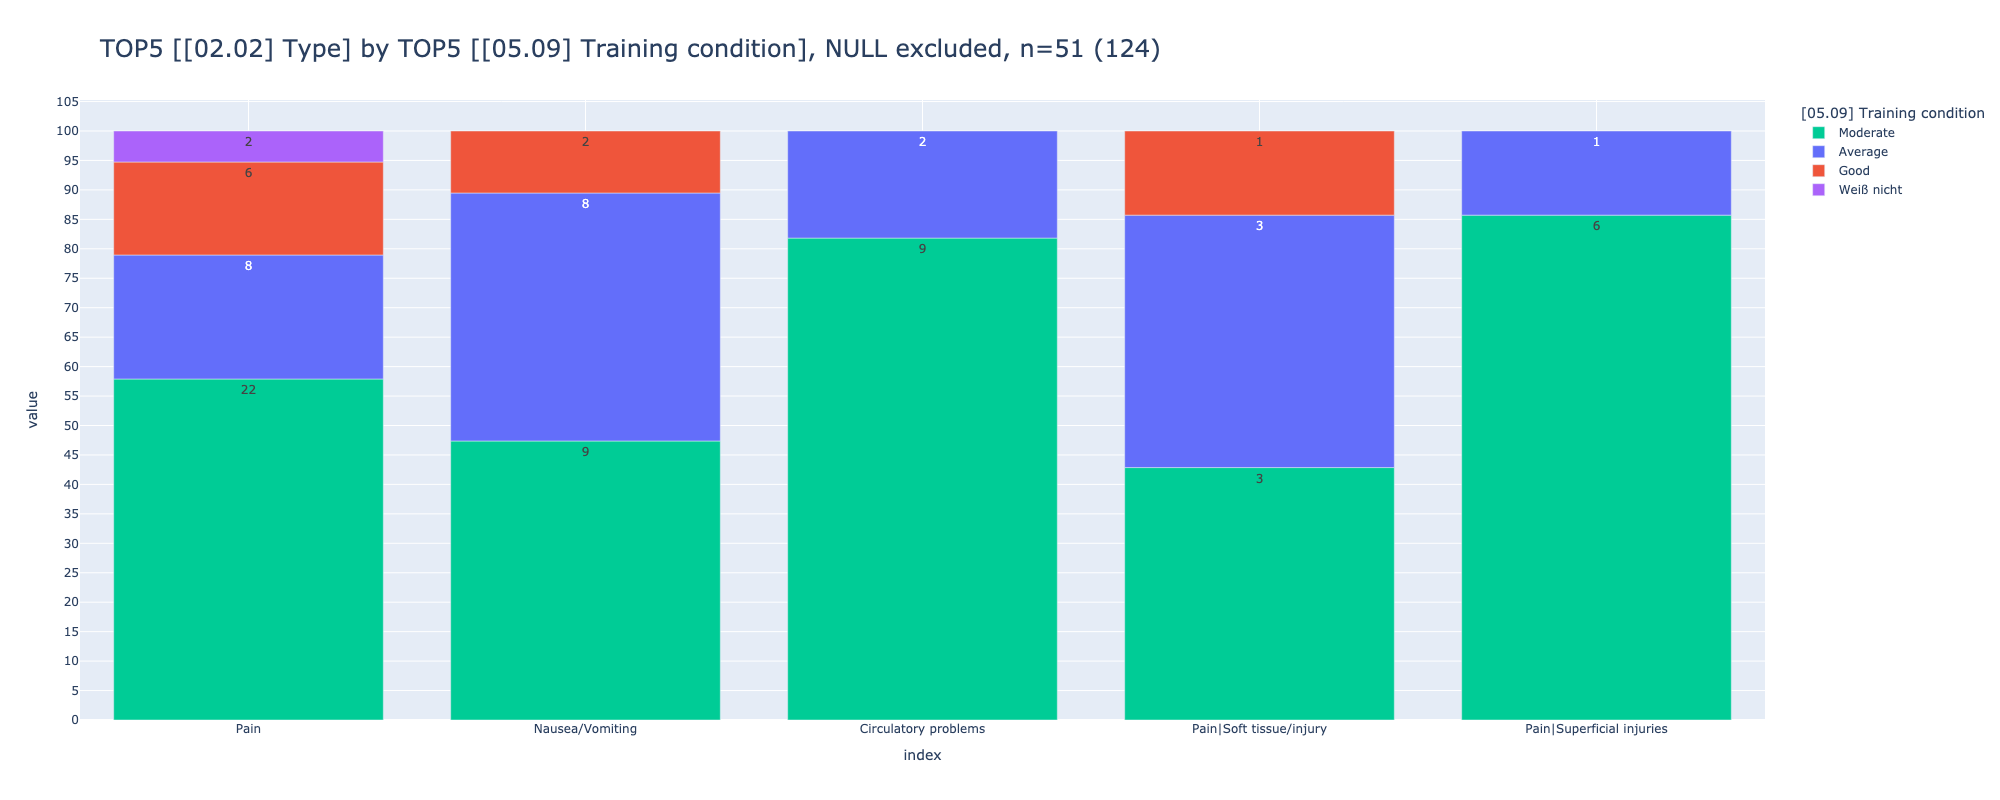

In [12]:
slide3=df_slides.find_cols(["[05.09]","[02.02]"])
create_multi_chart(df_slides[slide3])
#_df

### <a id='toc1_4_4_'></a>[slide 4](#toc0_)

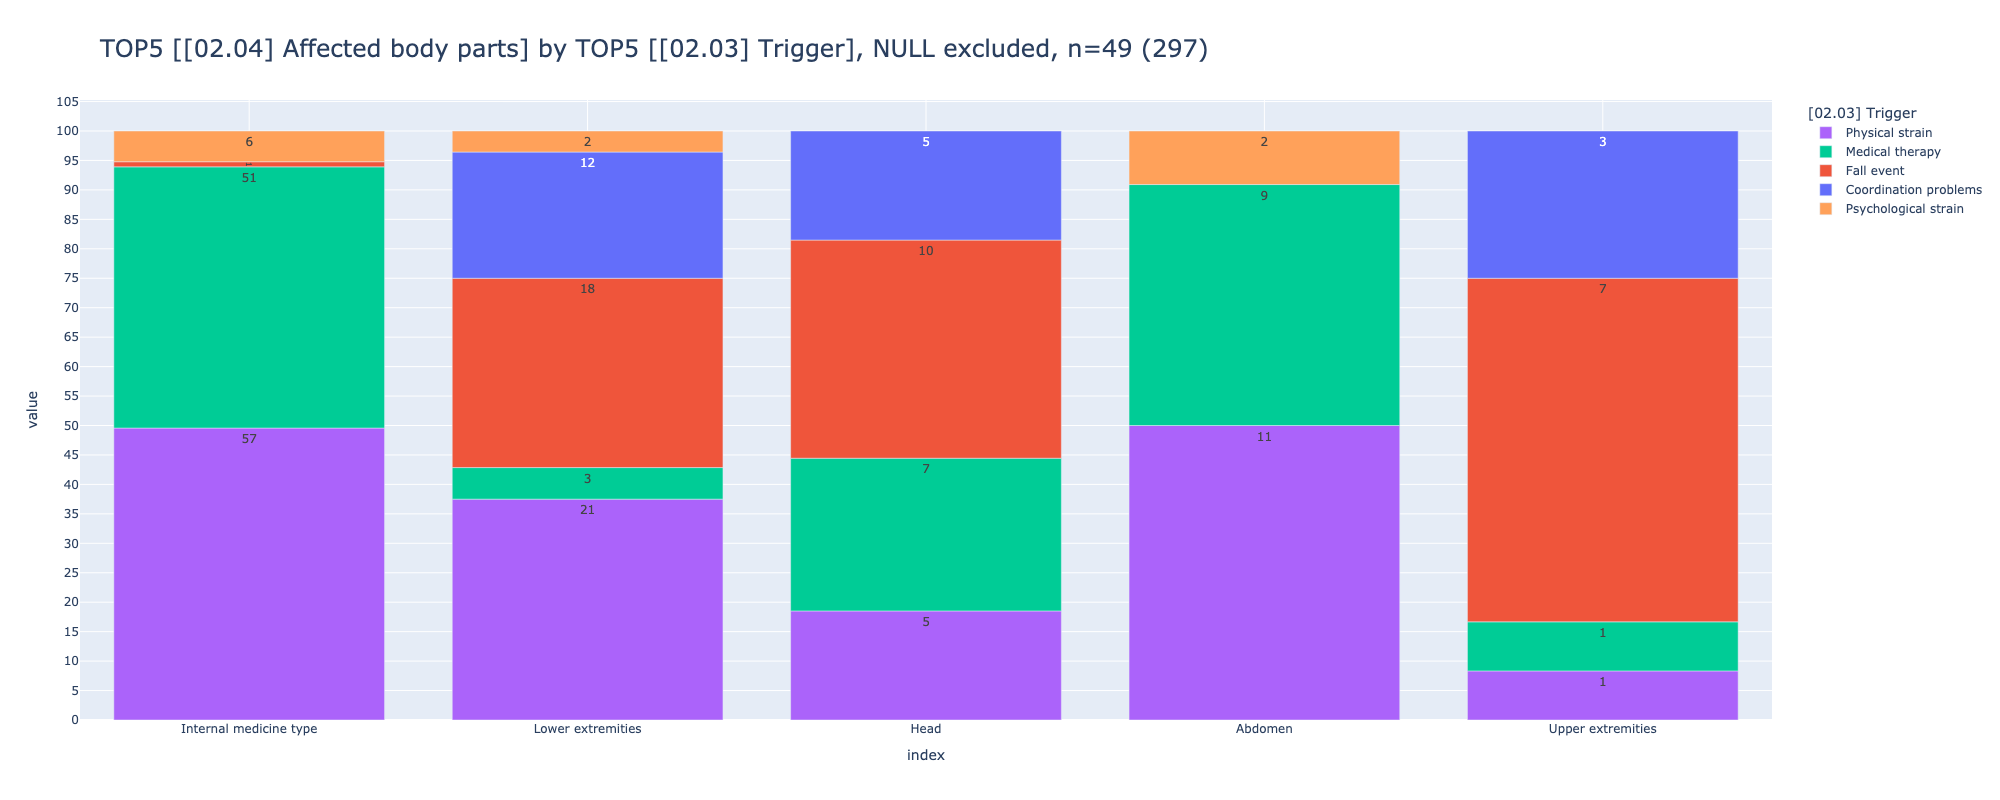

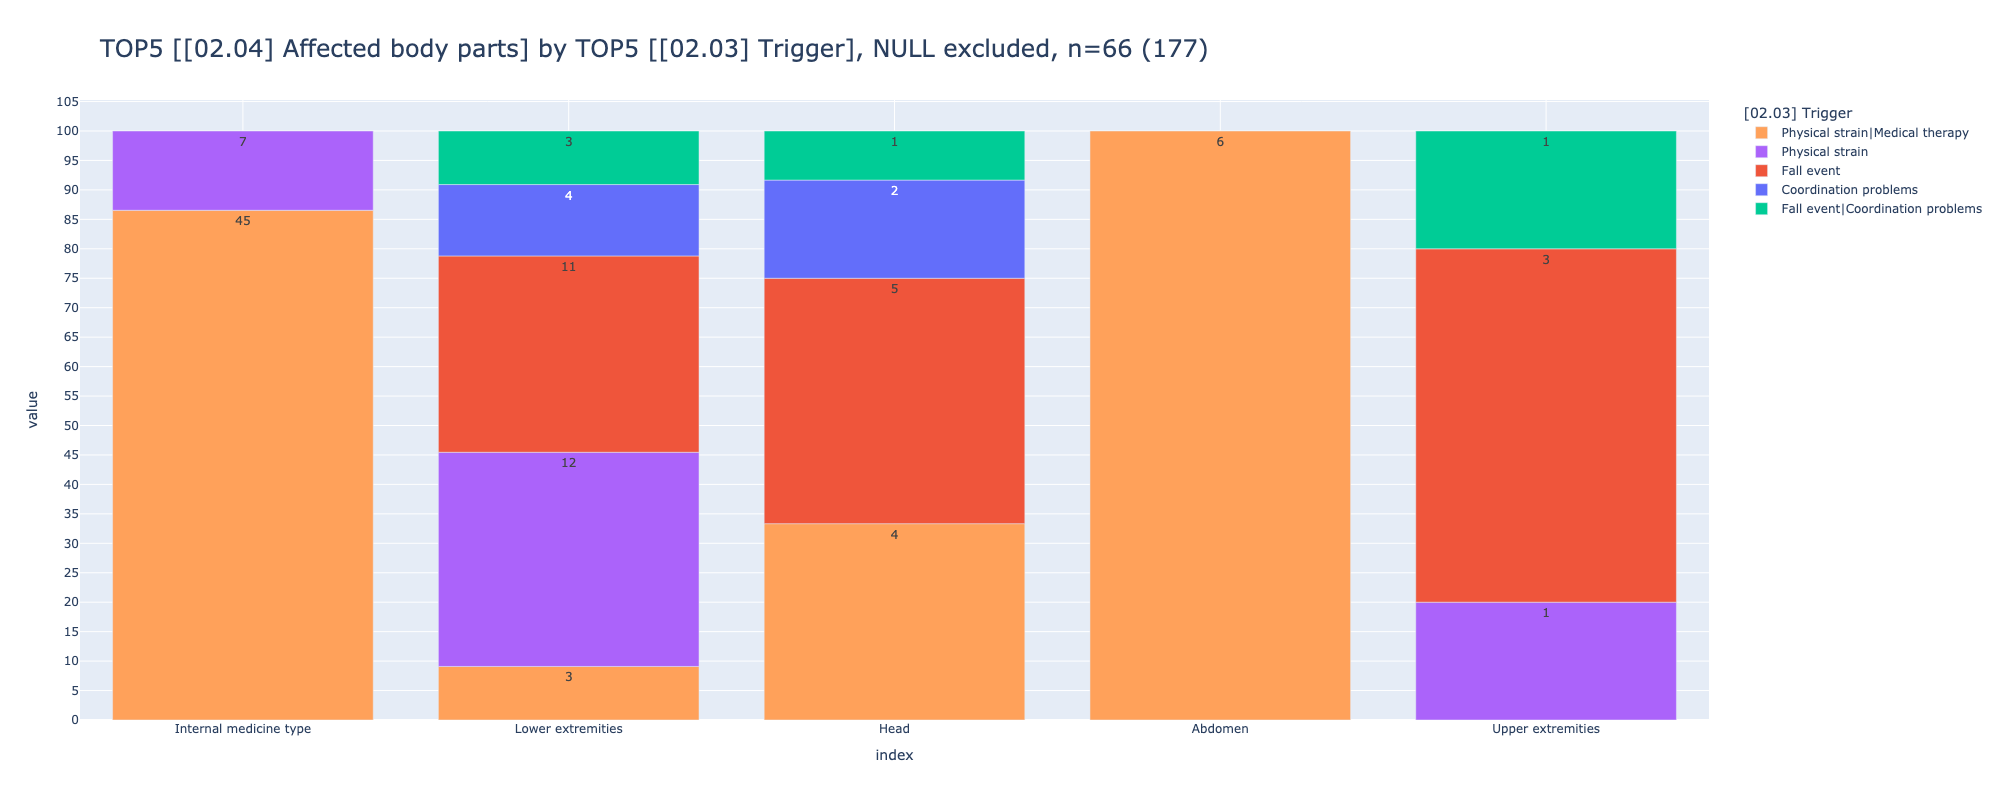

In [13]:
slide4=df_slides.find_cols(["[02.03]","[02.04]"])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_5_'></a>[slide 5](#toc0_)

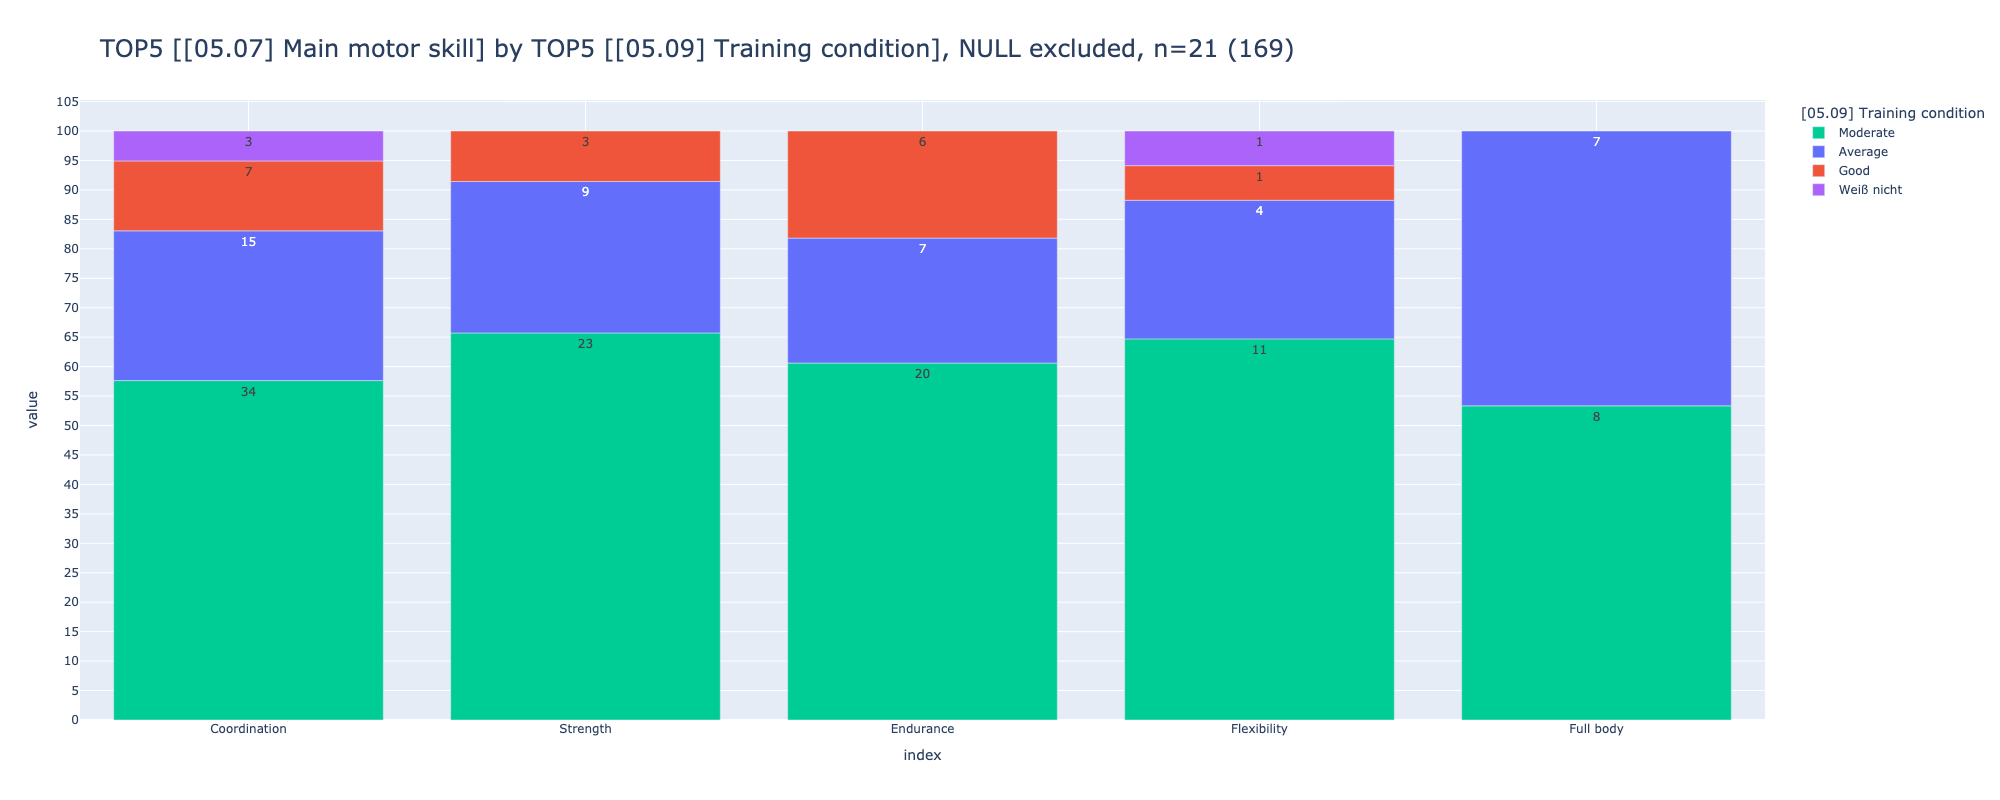

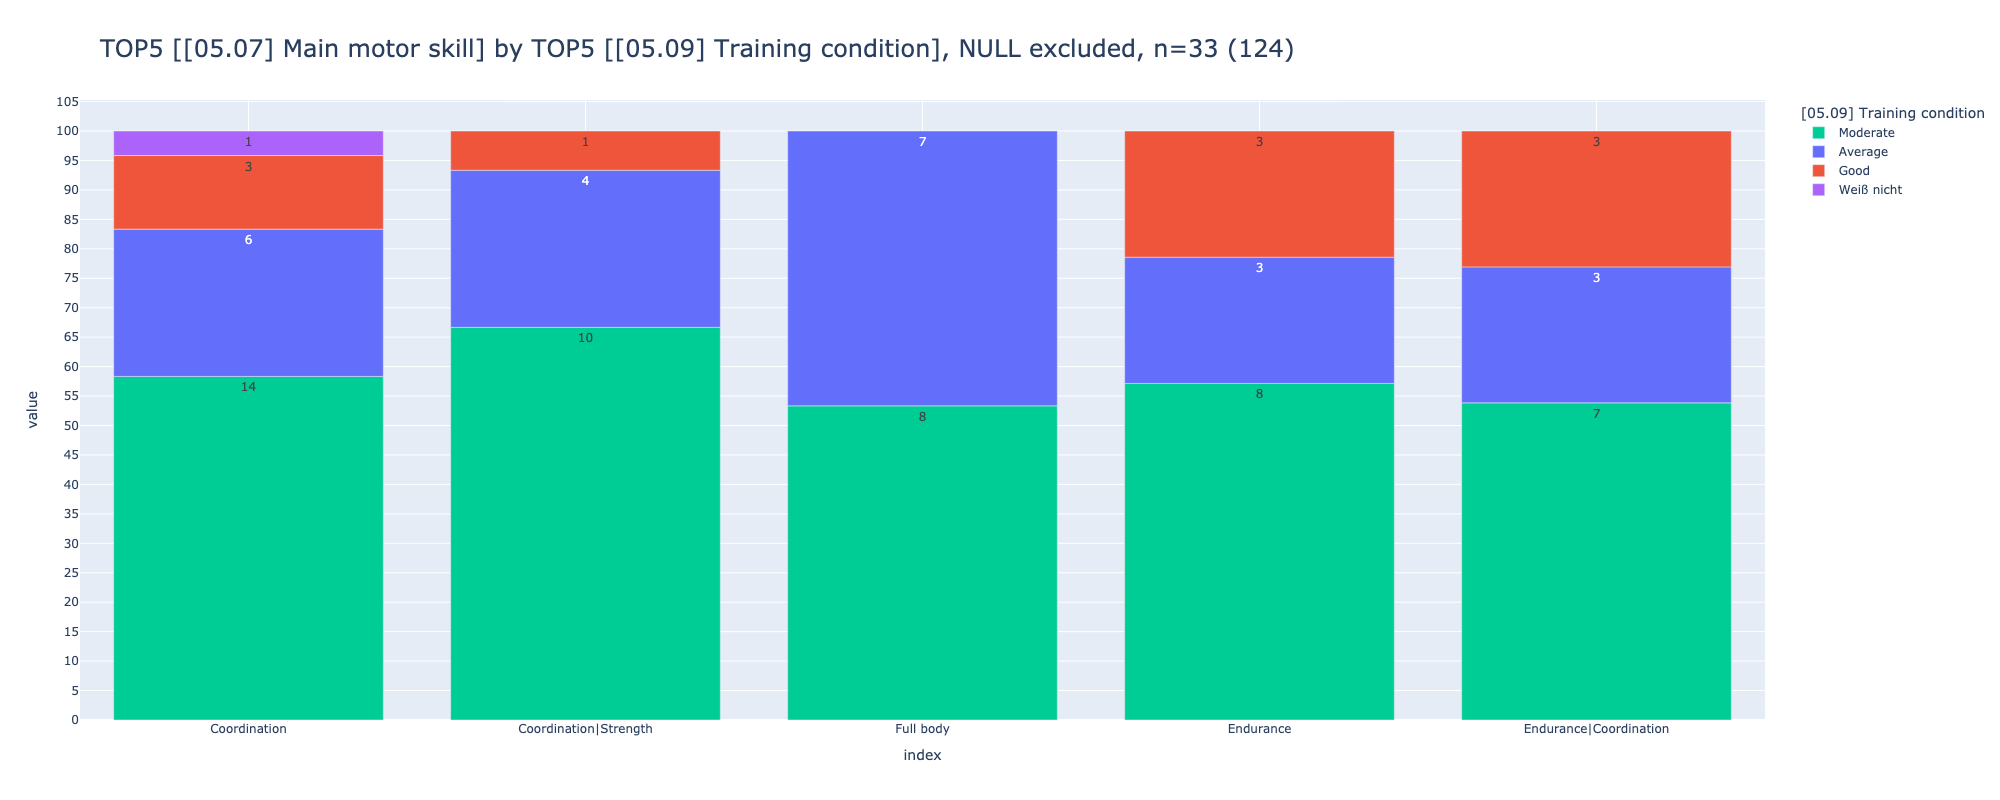

In [14]:
slide4=df_slides.find_cols(["[05.09]","[05.07]"])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_6_'></a>[slide 6](#toc0_)

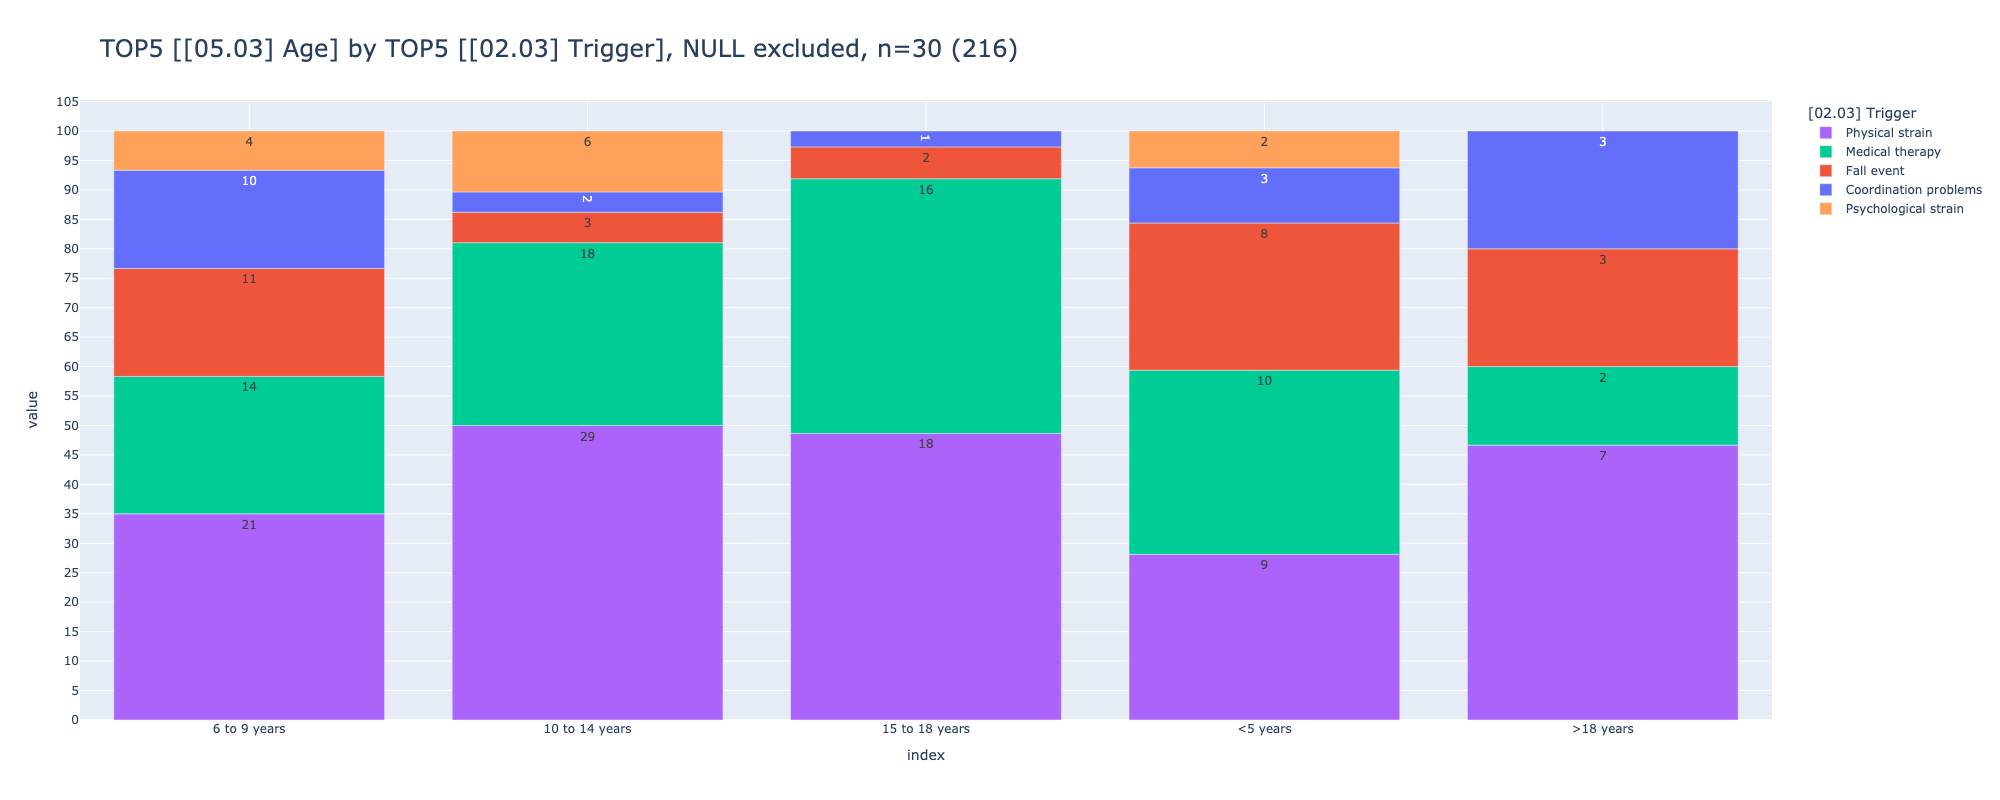

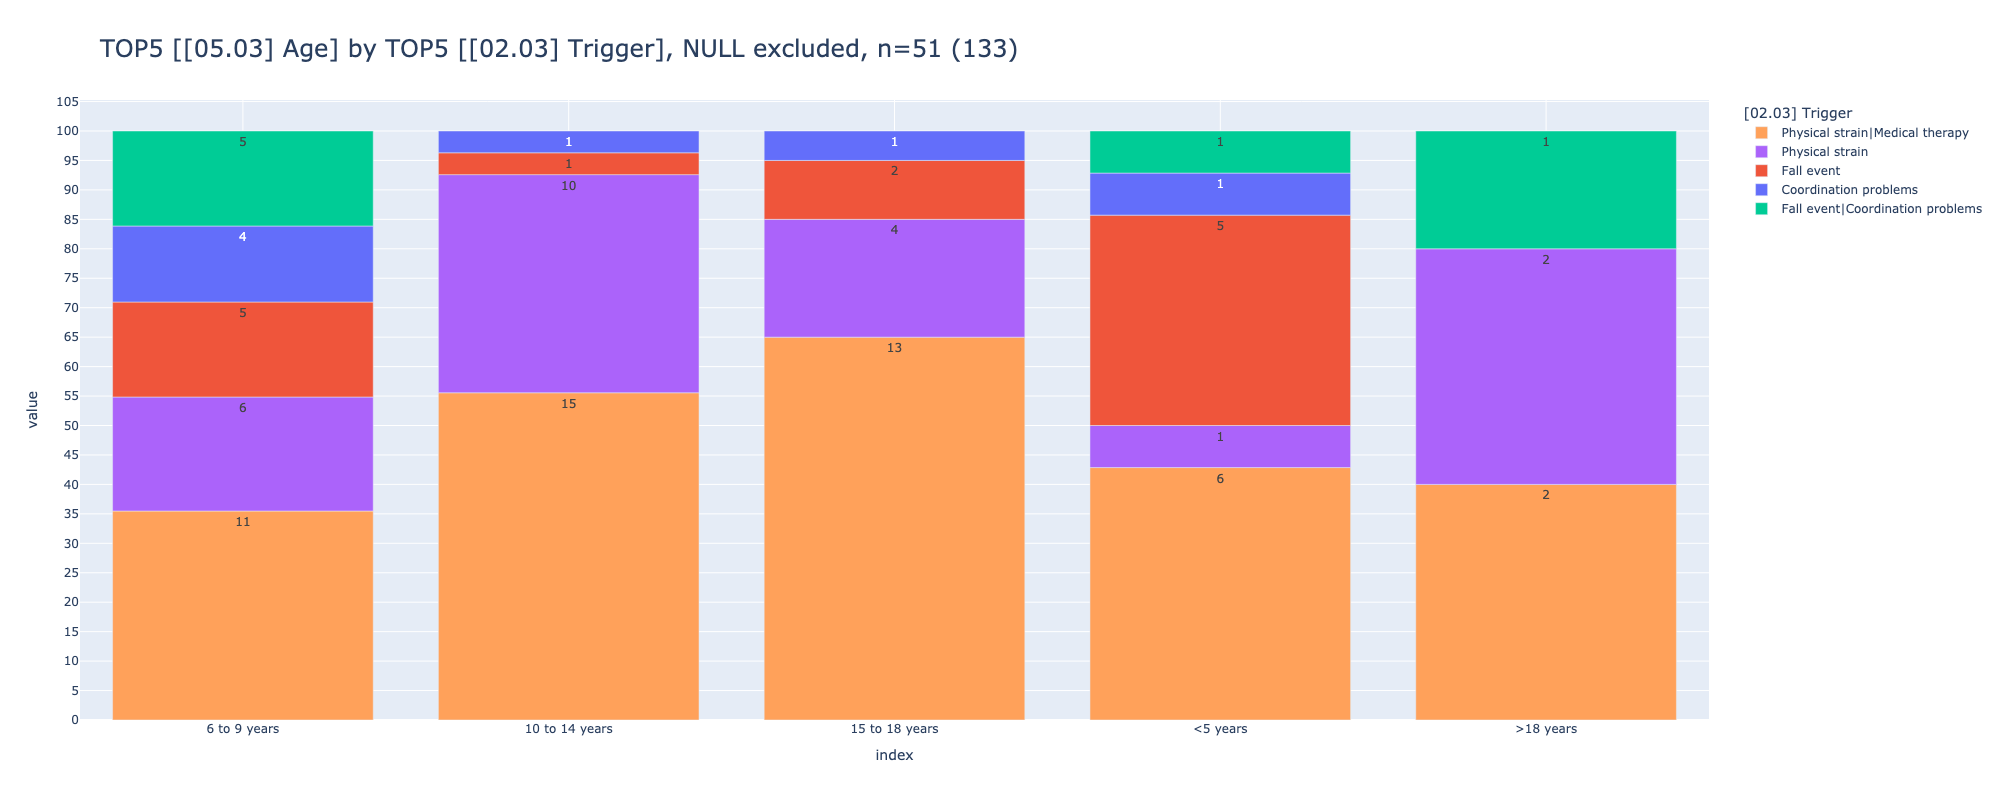

In [15]:
# todo create new variable
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_7_'></a>[slide 7](#toc0_)

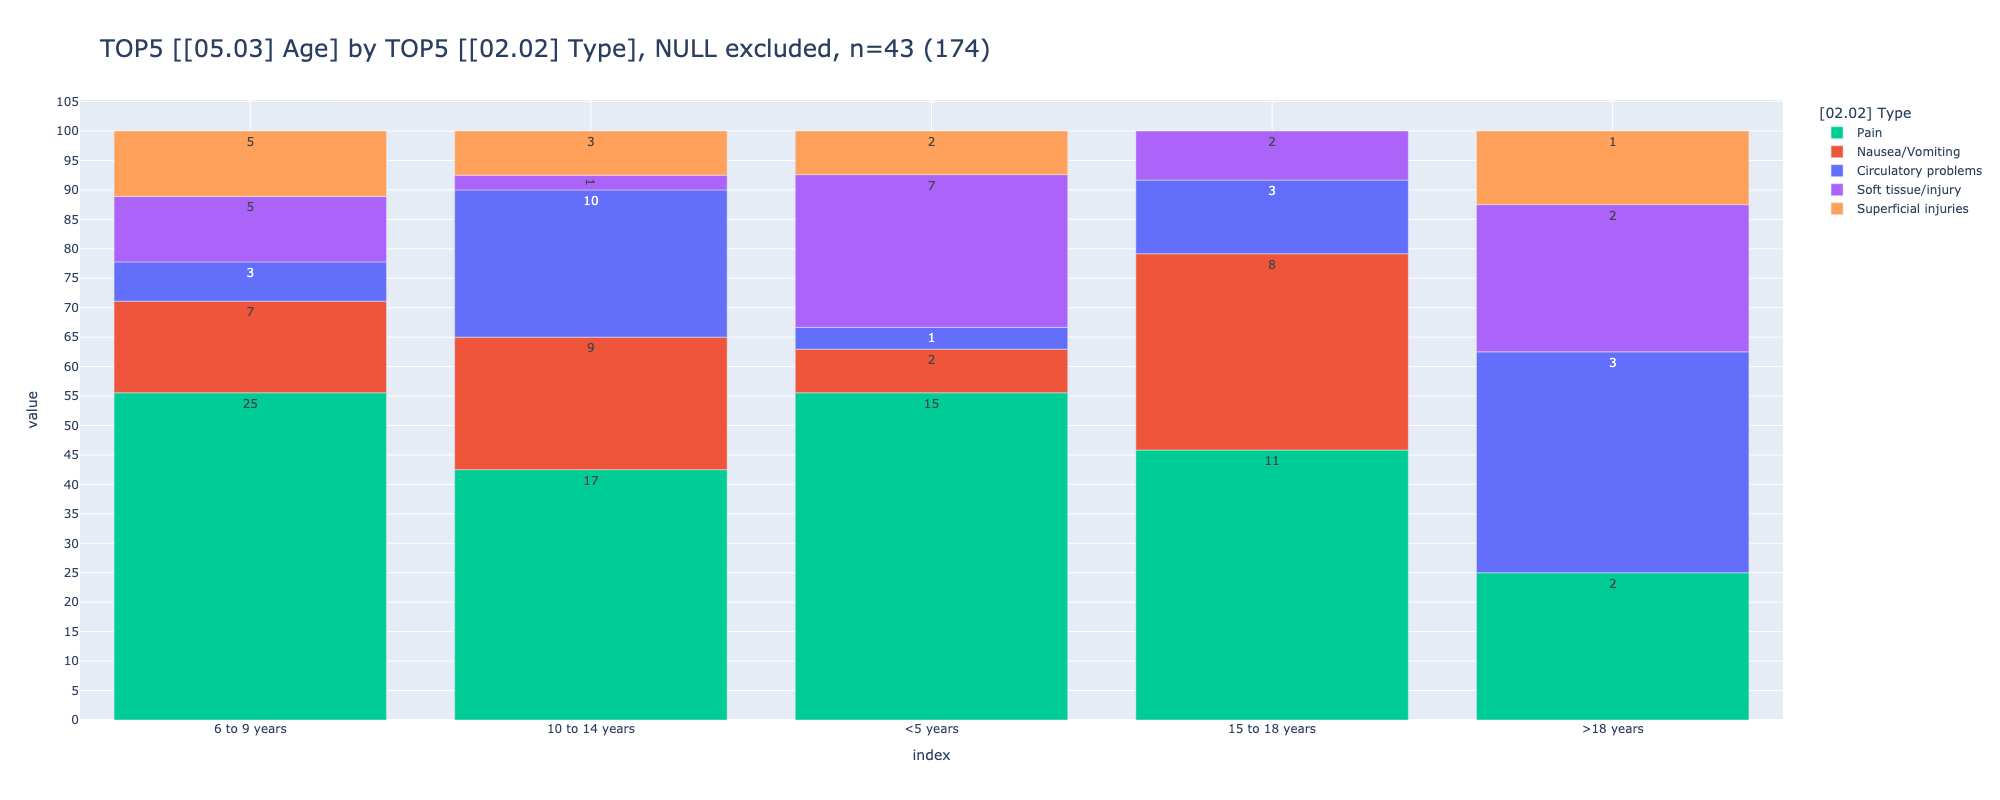

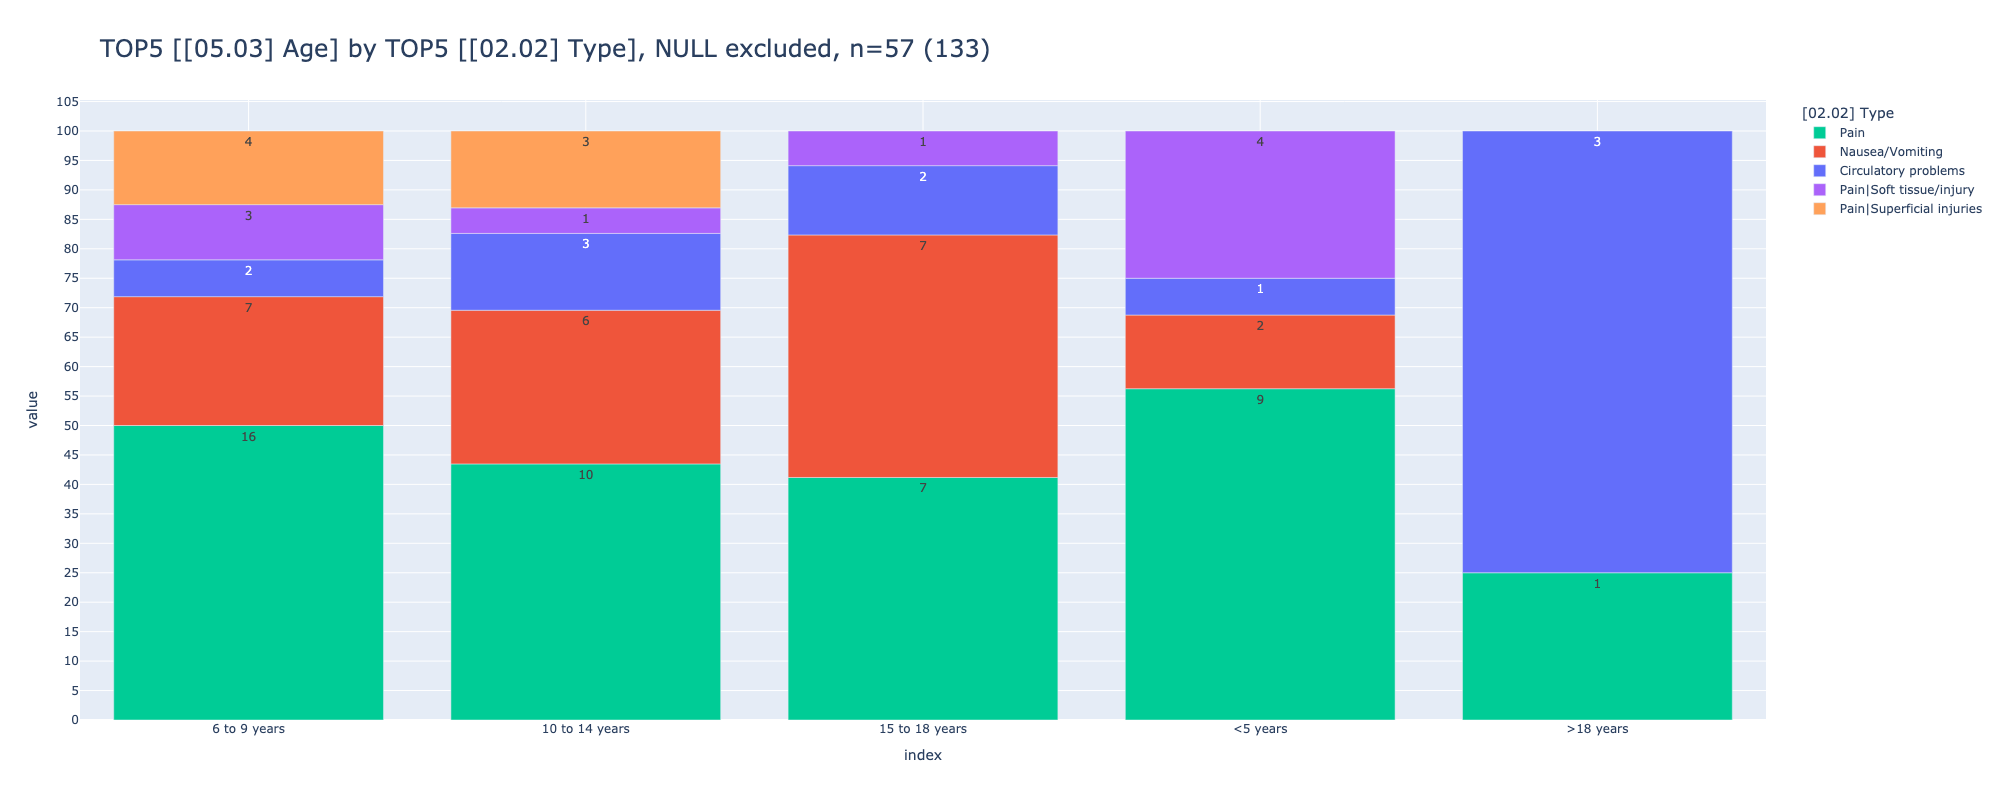

In [16]:
slide4=df_slides.find_cols([
    "[02.02]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_8_'></a>[slide 8](#toc0_)

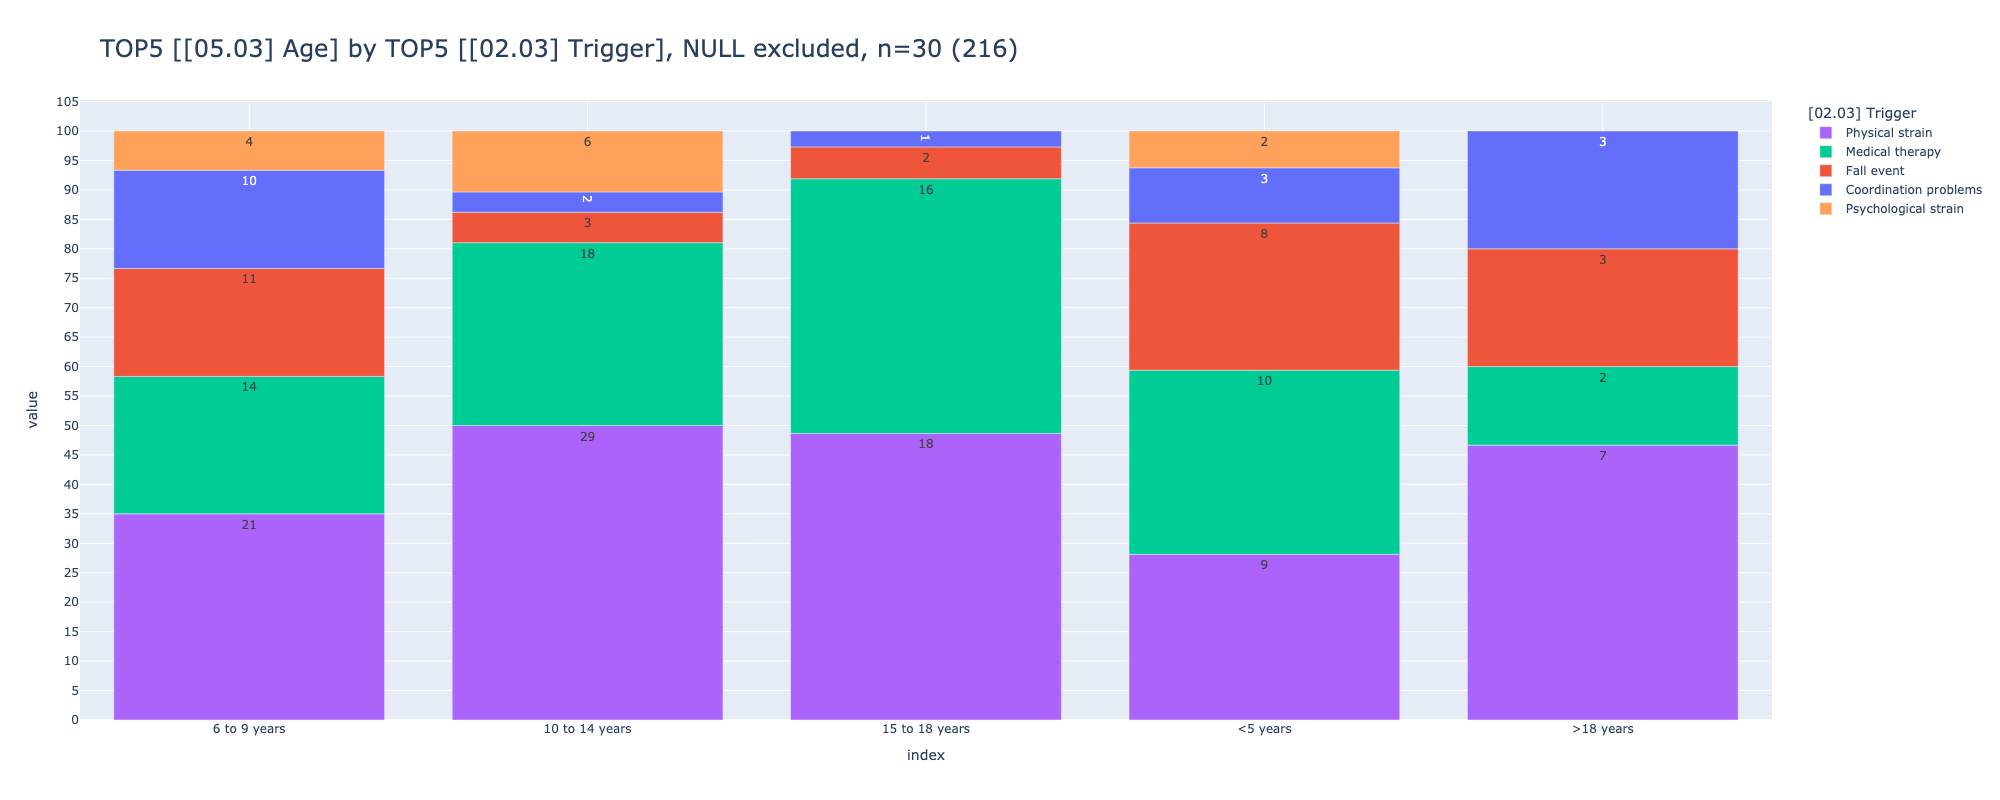

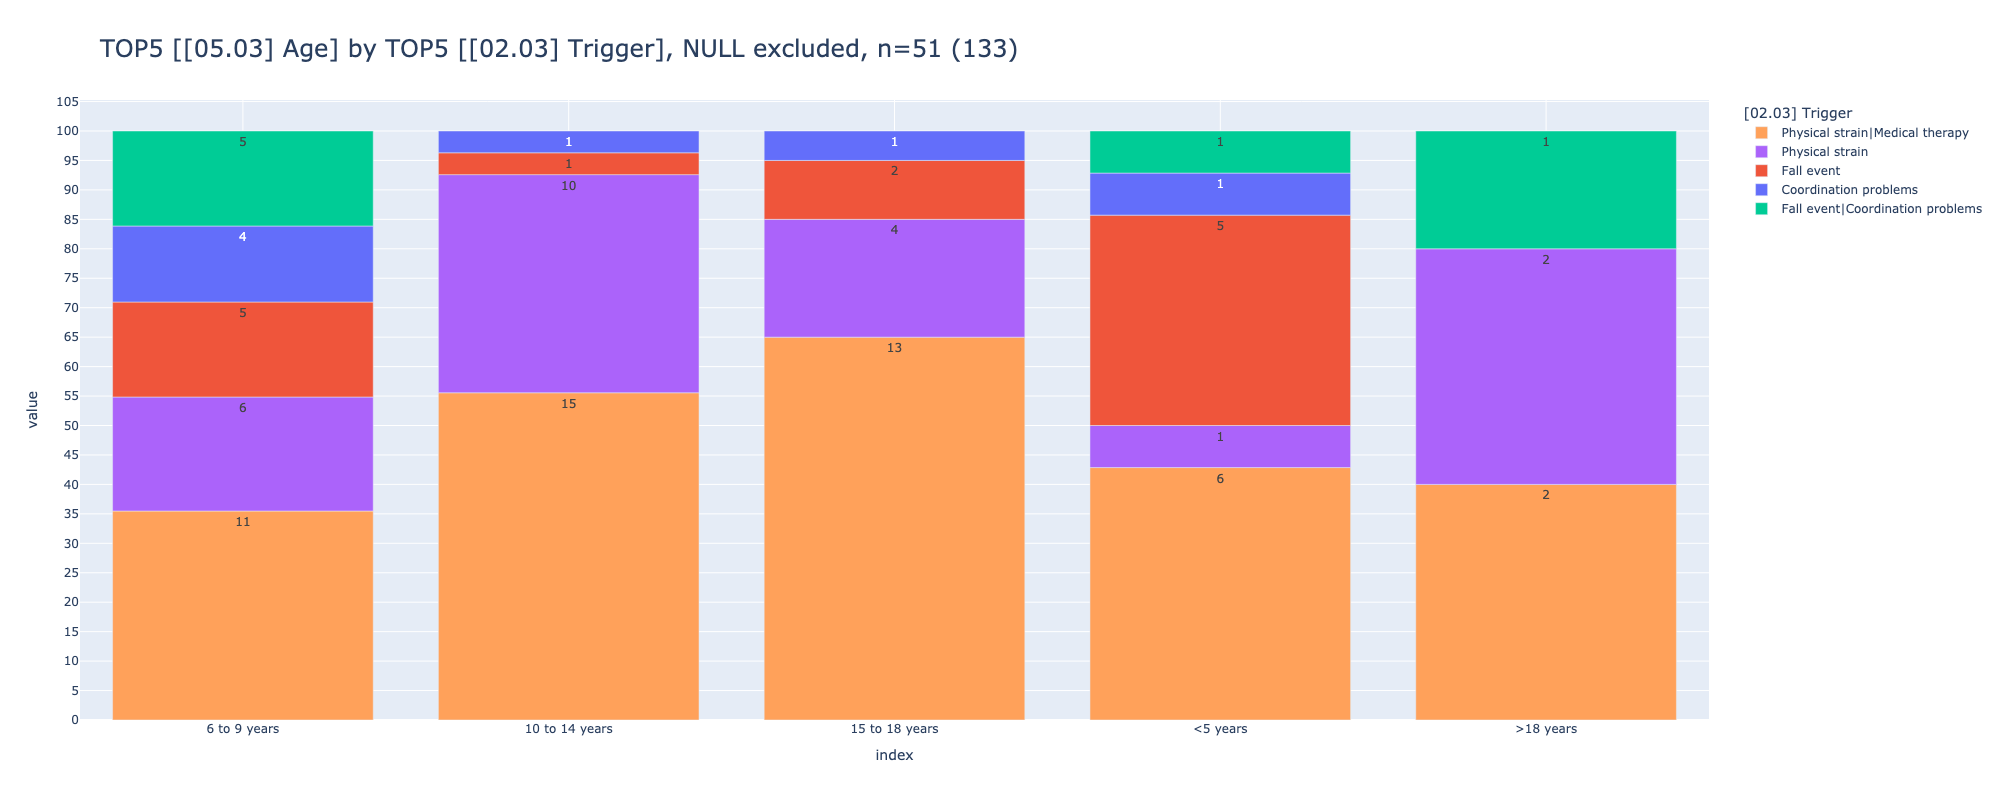

In [17]:
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_9_'></a>[slide 9](#toc0_)

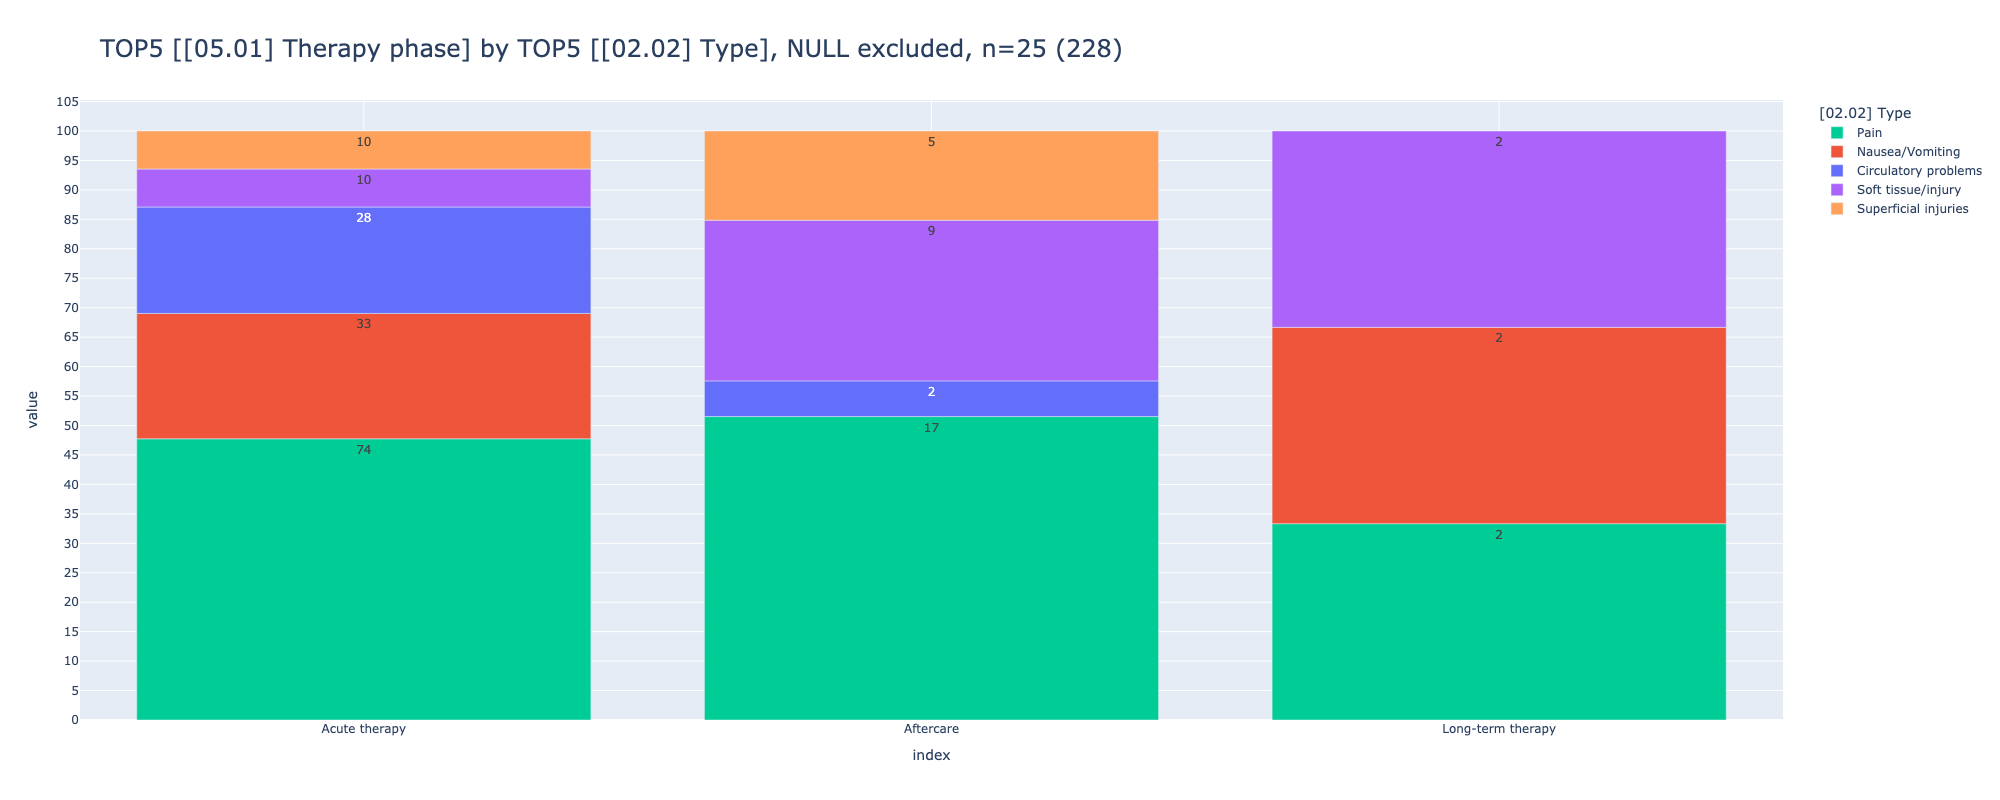

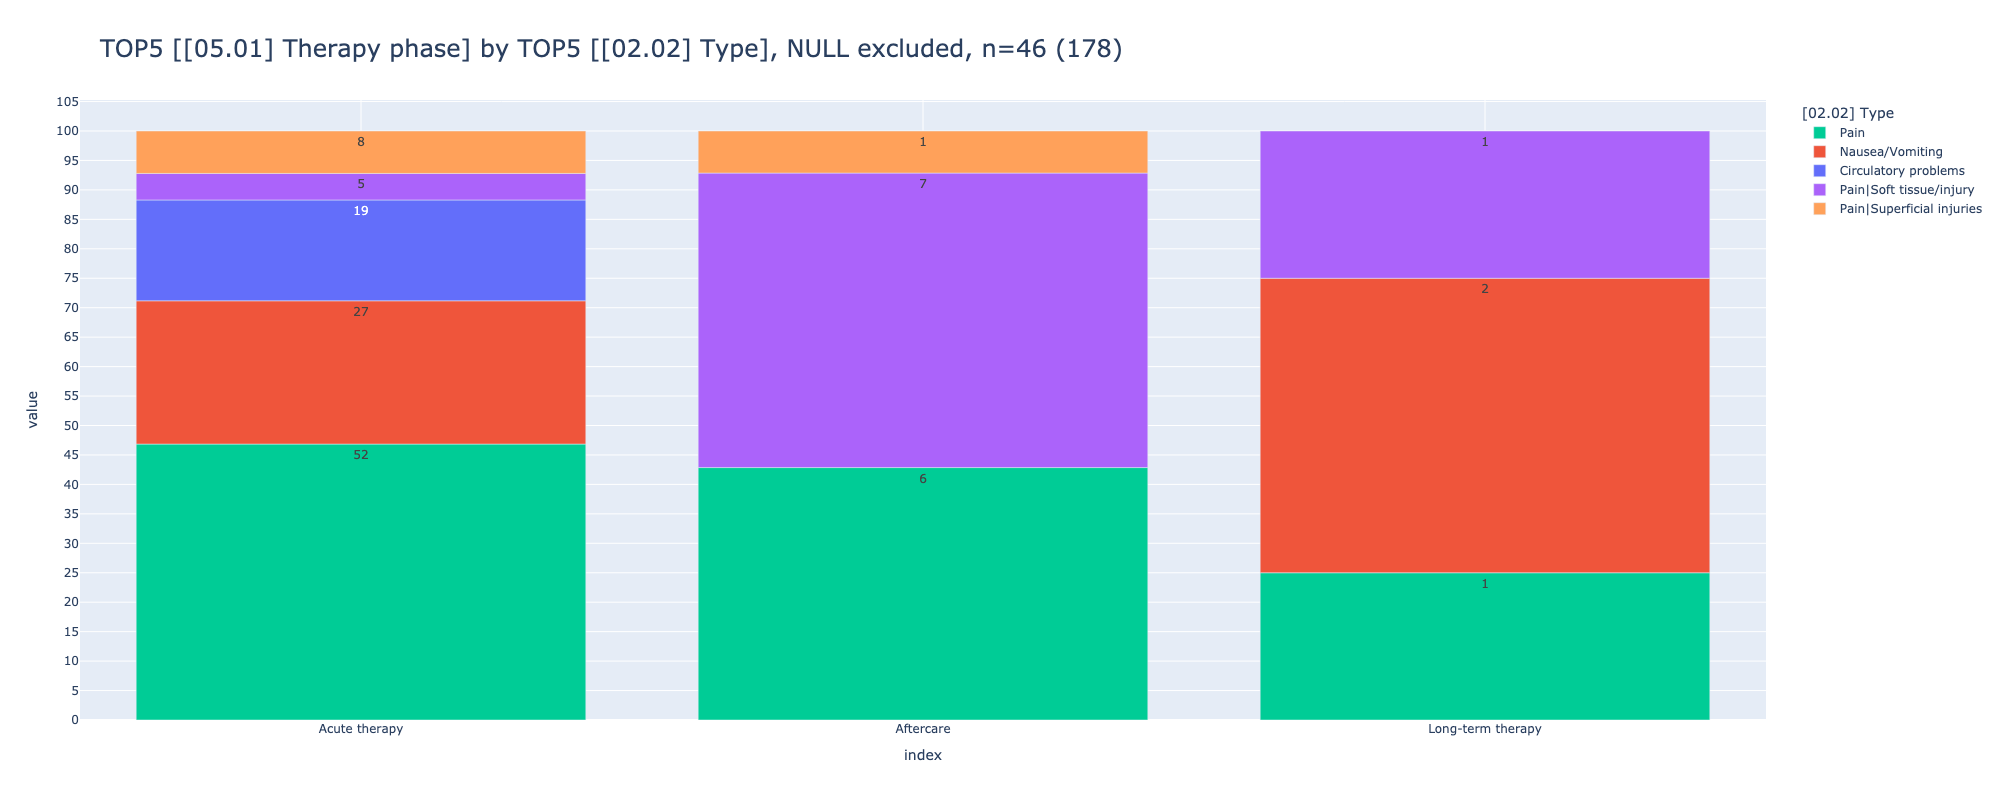

In [18]:
slide4=df_slides.find_cols([
    "[02.02]",
    "[05.01]",
    ])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_10_'></a>[slide 10](#toc0_)

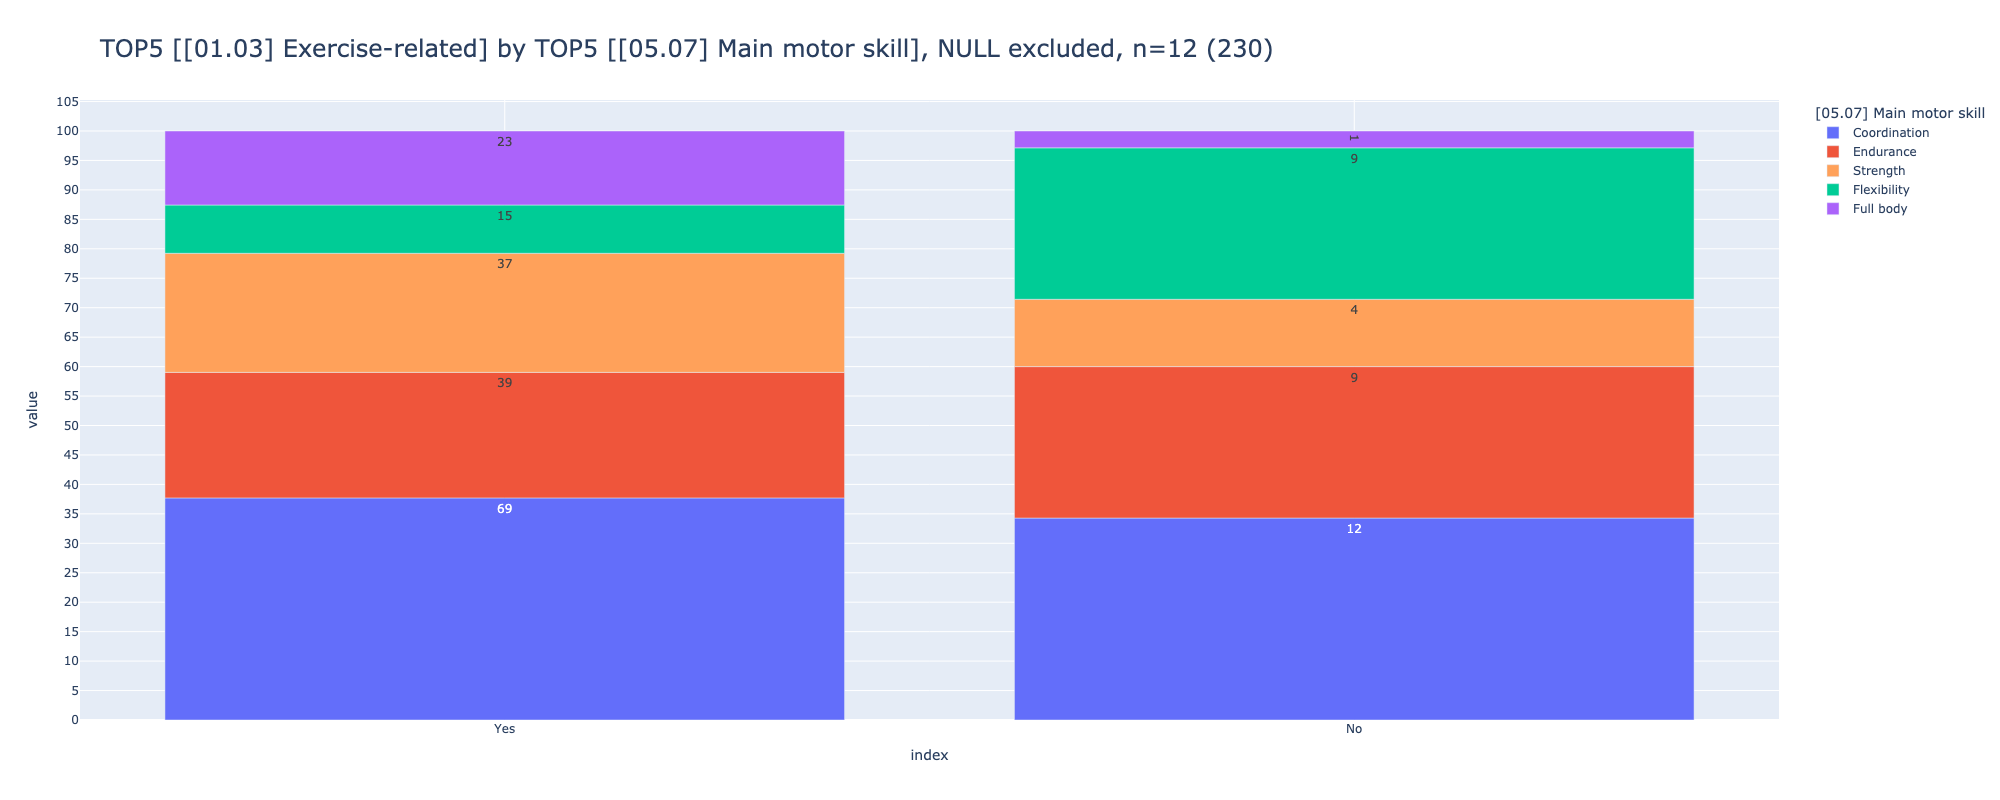

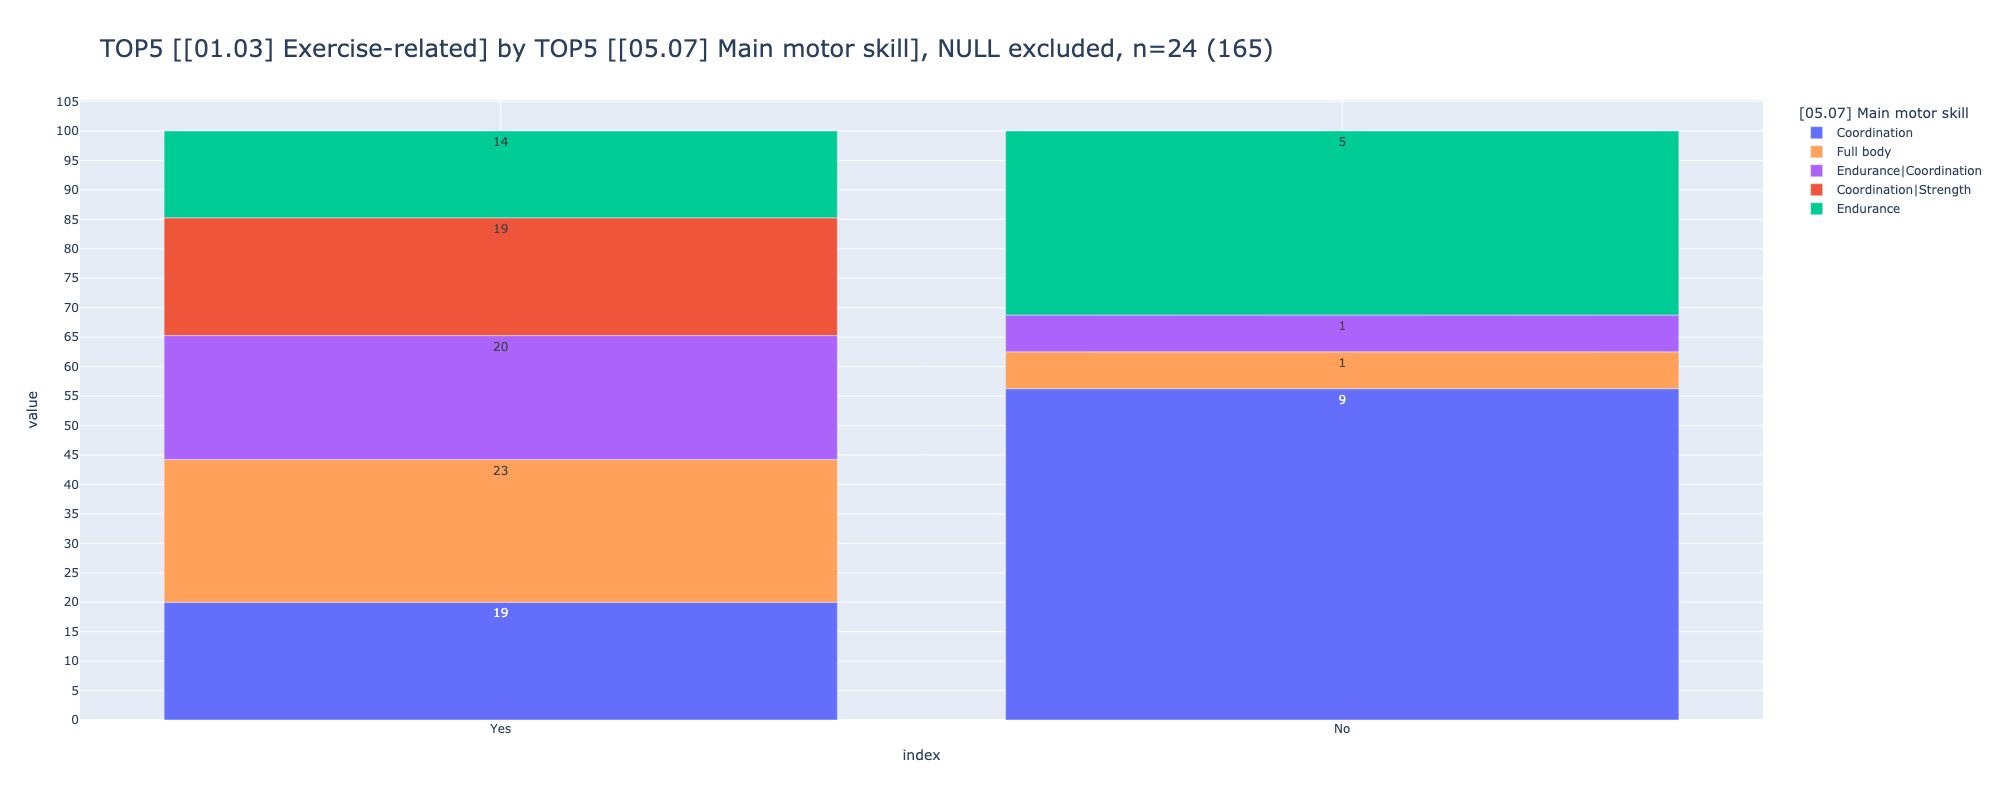

In [19]:
slide4=df_slides.find_cols([
    "[05.07]",
    "[01.03]",
    ])
create_multi_chart(df_slides[slide4])
#_df

### <a id='toc1_4_11_'></a>[bonus - ci](#toc0_)

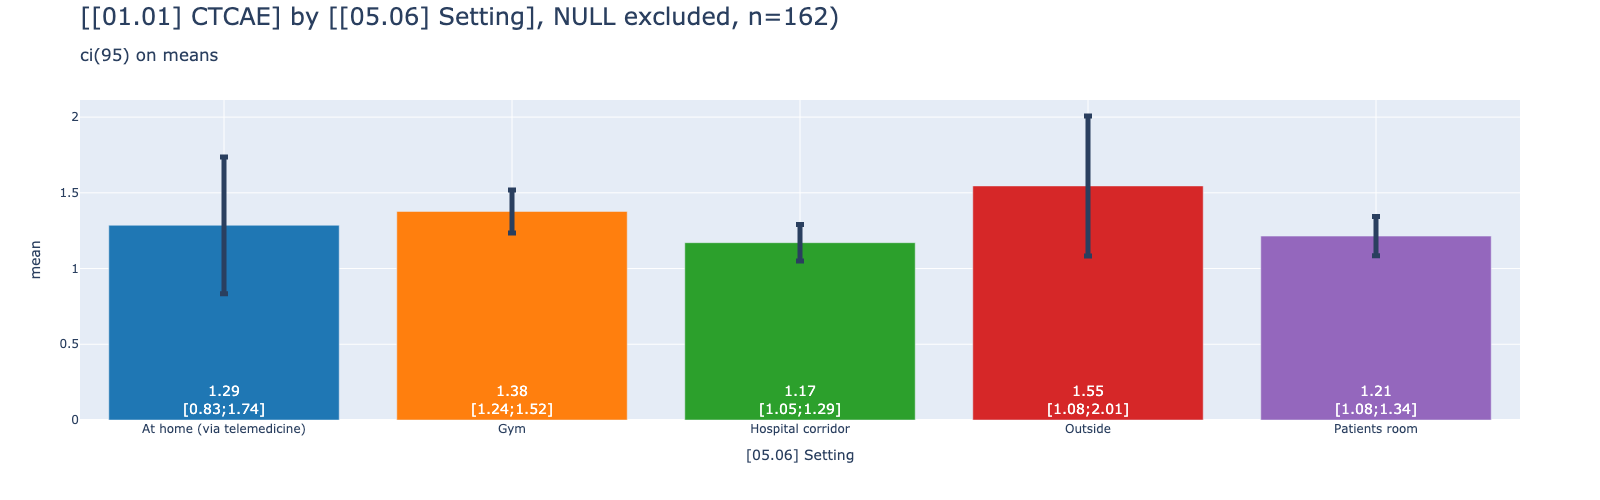

In [20]:
_cols = df_csv_condensed.find_cols(["[05.06]", "[01.01]"])
_cols
_df = df_csv_condensed[_cols].dropna()
_df = _df.astype({"[01.01] CTCAE": int})
_=pls.plot_bars(
    _df,
    use_ci=True,
    precision=2,
)


## <a id='toc1_5_'></a>[2025-03-18](#toc0_)

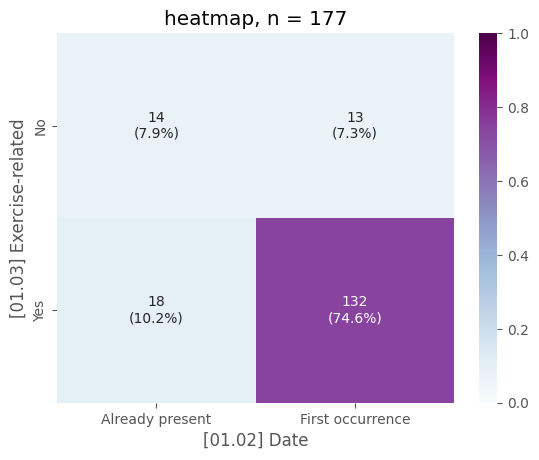

In [21]:
slide11=df_slides.find_cols([
    "[01.03]",
    "[01.02]",
    ])
# create_multi_chart(df_slides[slide11].dropna())
_=pls.plot_quadrants(df_slides[slide11].dropna())
# df_slides[slide11[1]].value_counts()


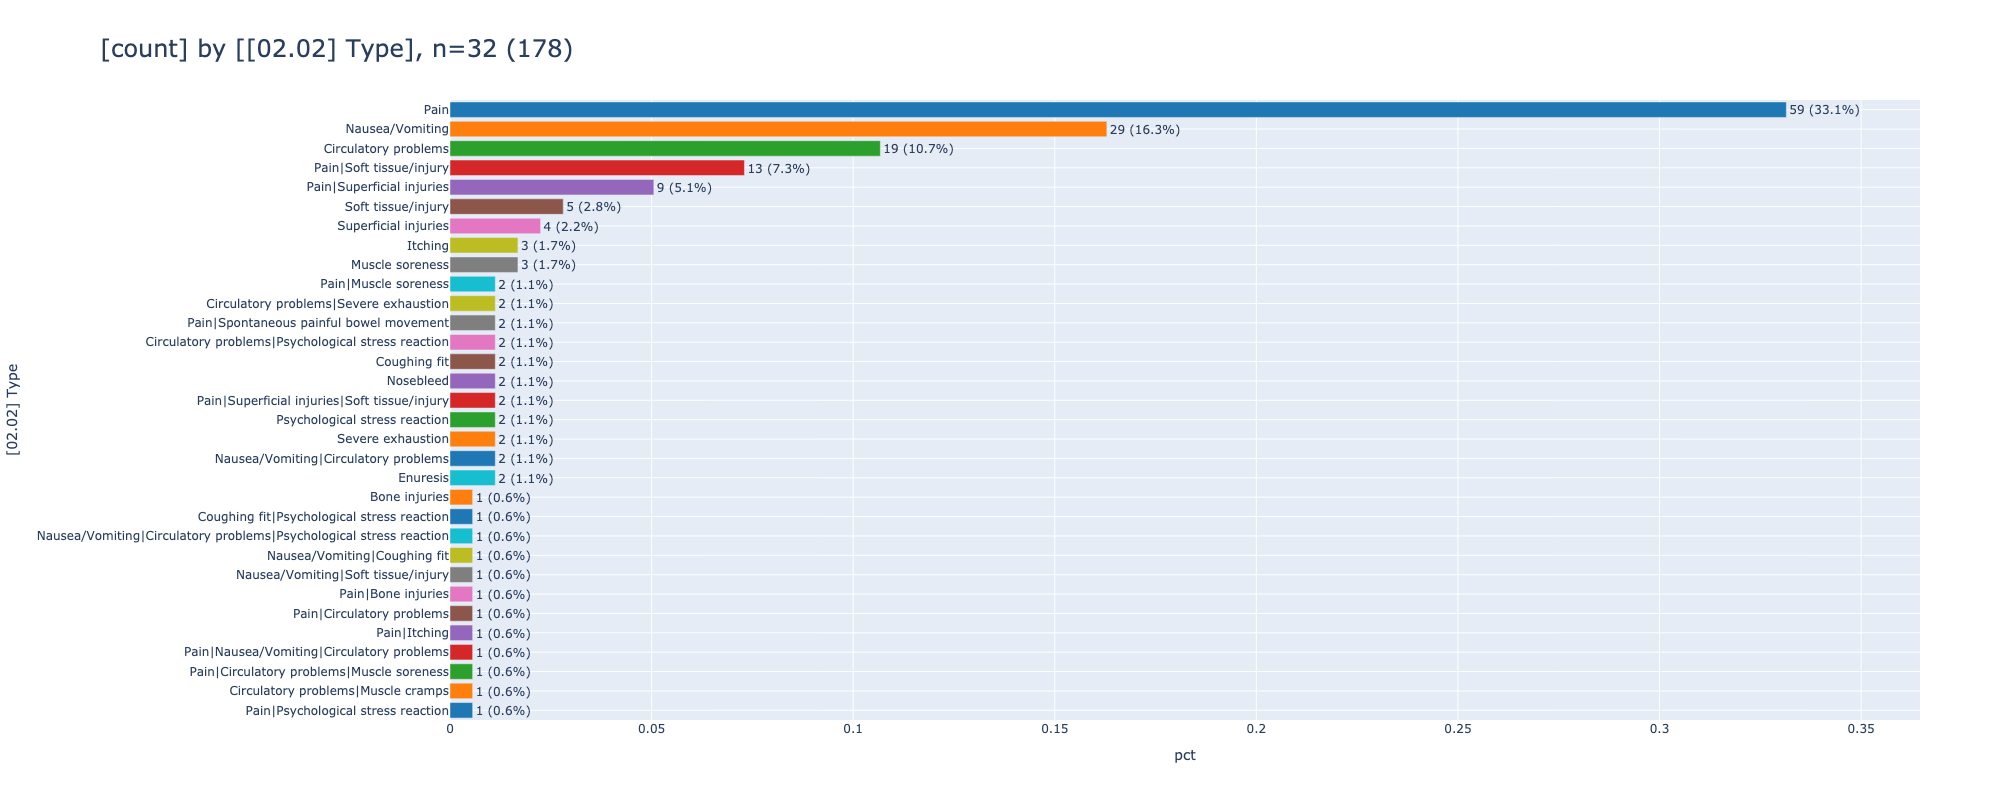

In [22]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.02]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

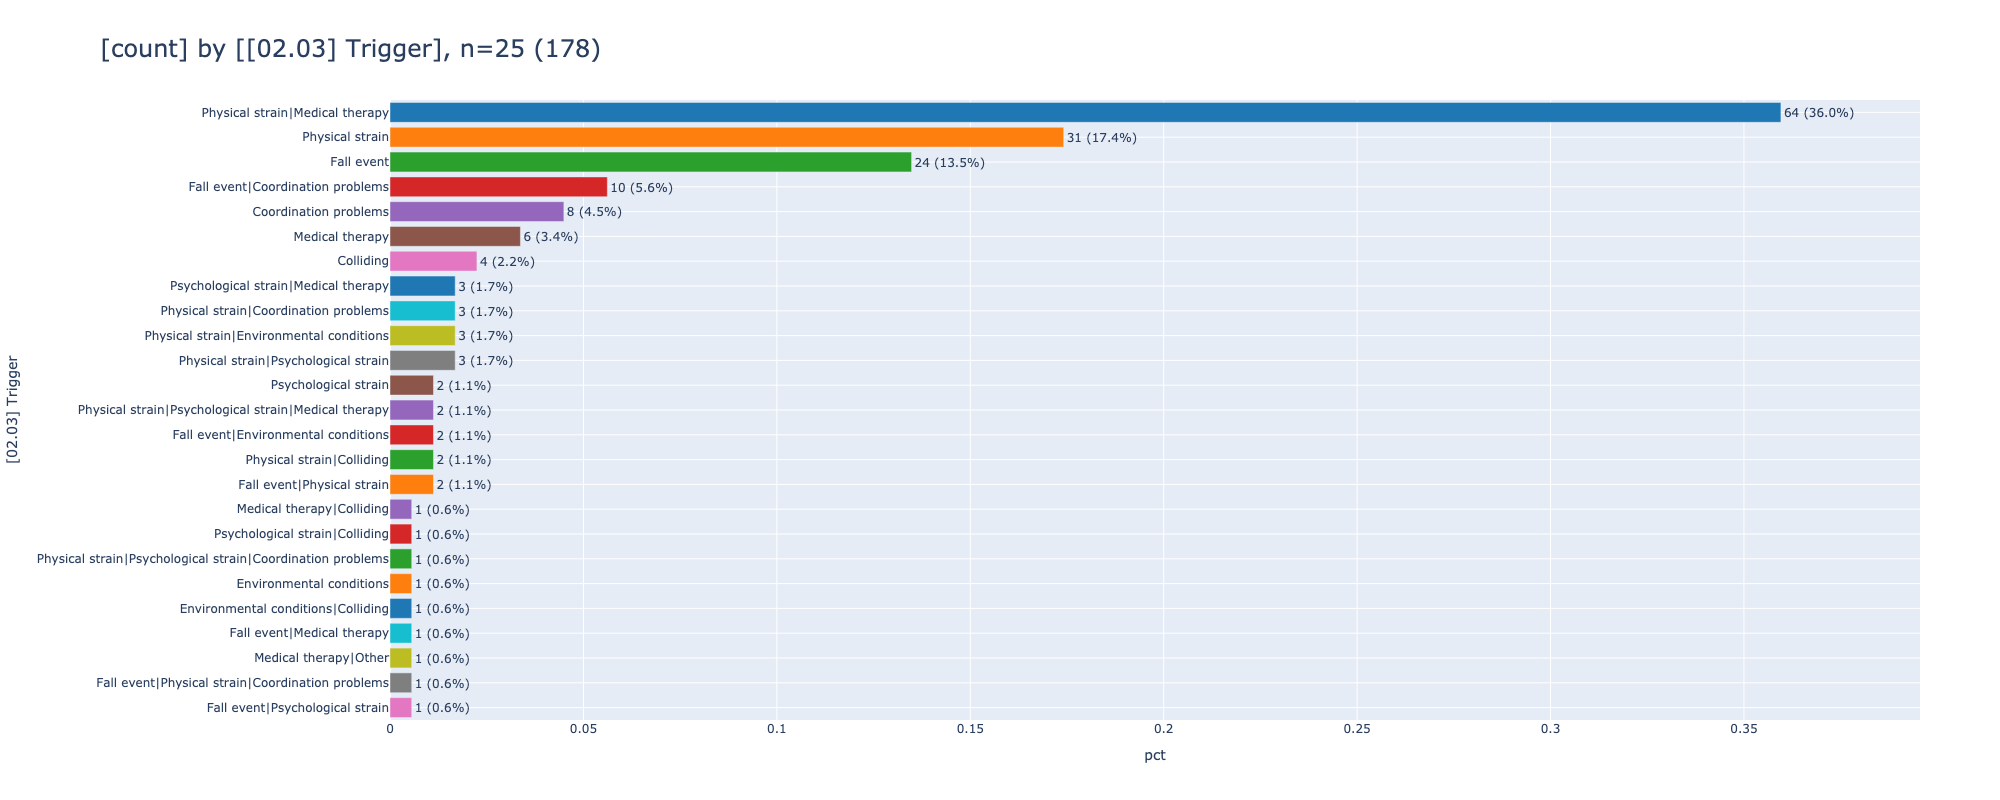

In [23]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.03]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

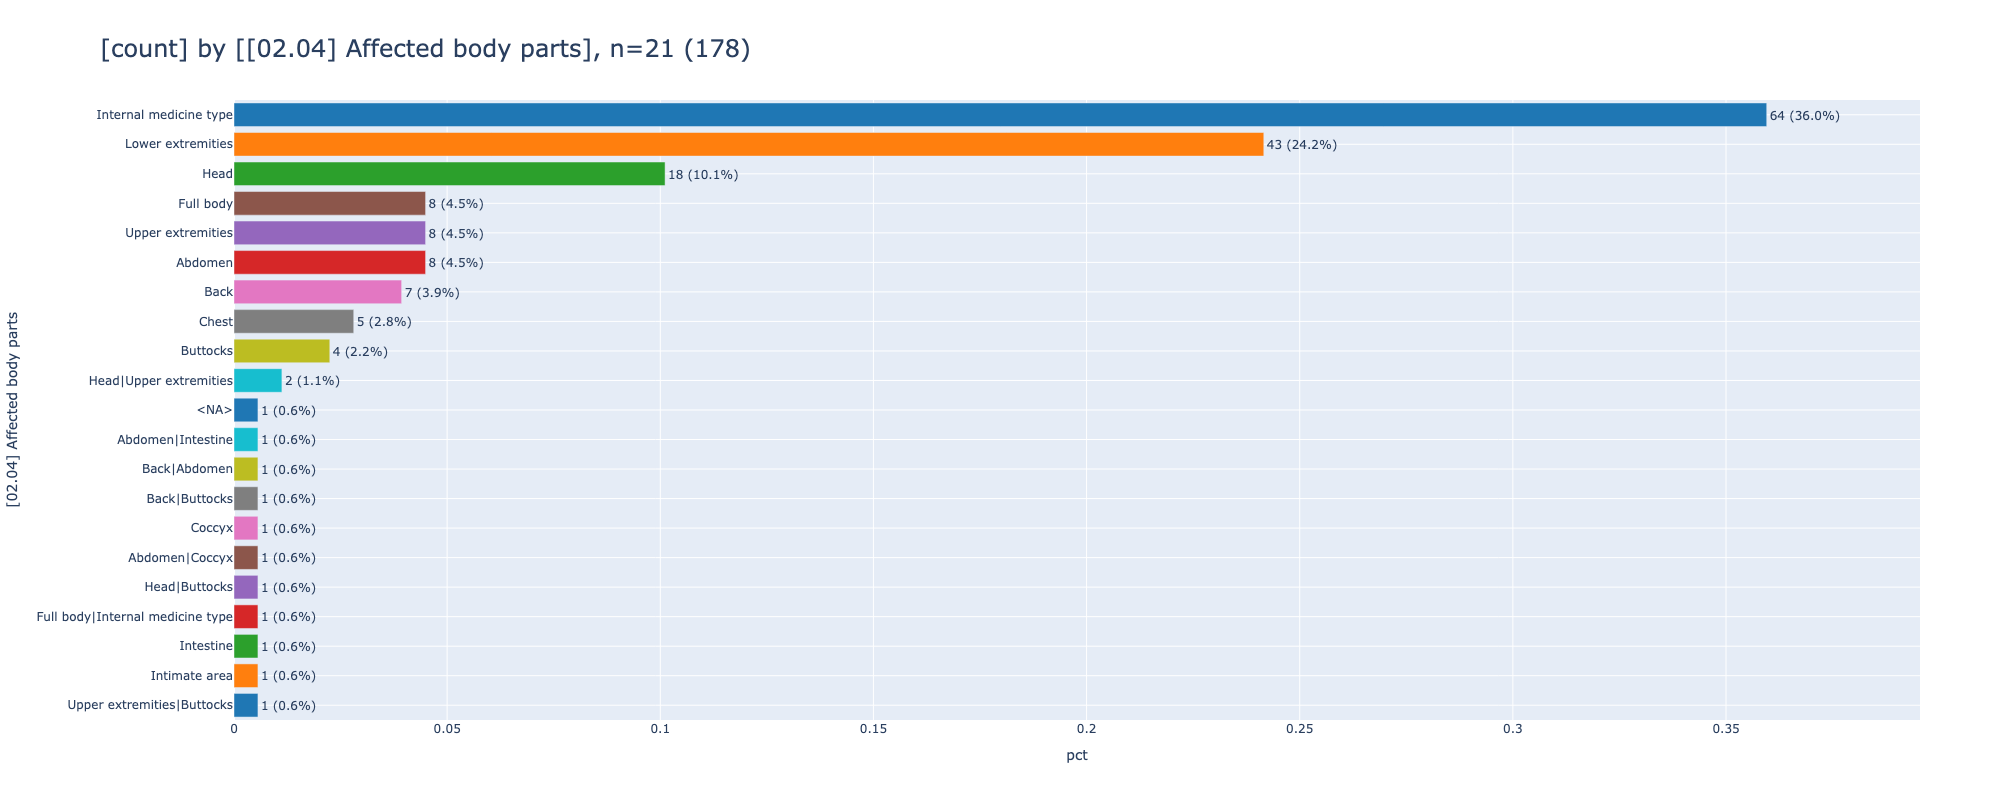

In [24]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.04]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

In [25]:
_cols = hlp.find_cols(df_csv_condensed, ["[03.07.01]", "[03.07.02]"])
_df = df_csv_condensed[_cols]
_=pls.plot_stacked_bars(
    _df,
    orientation="h",
    )


❌ df must have exactly 2 or 3 columns


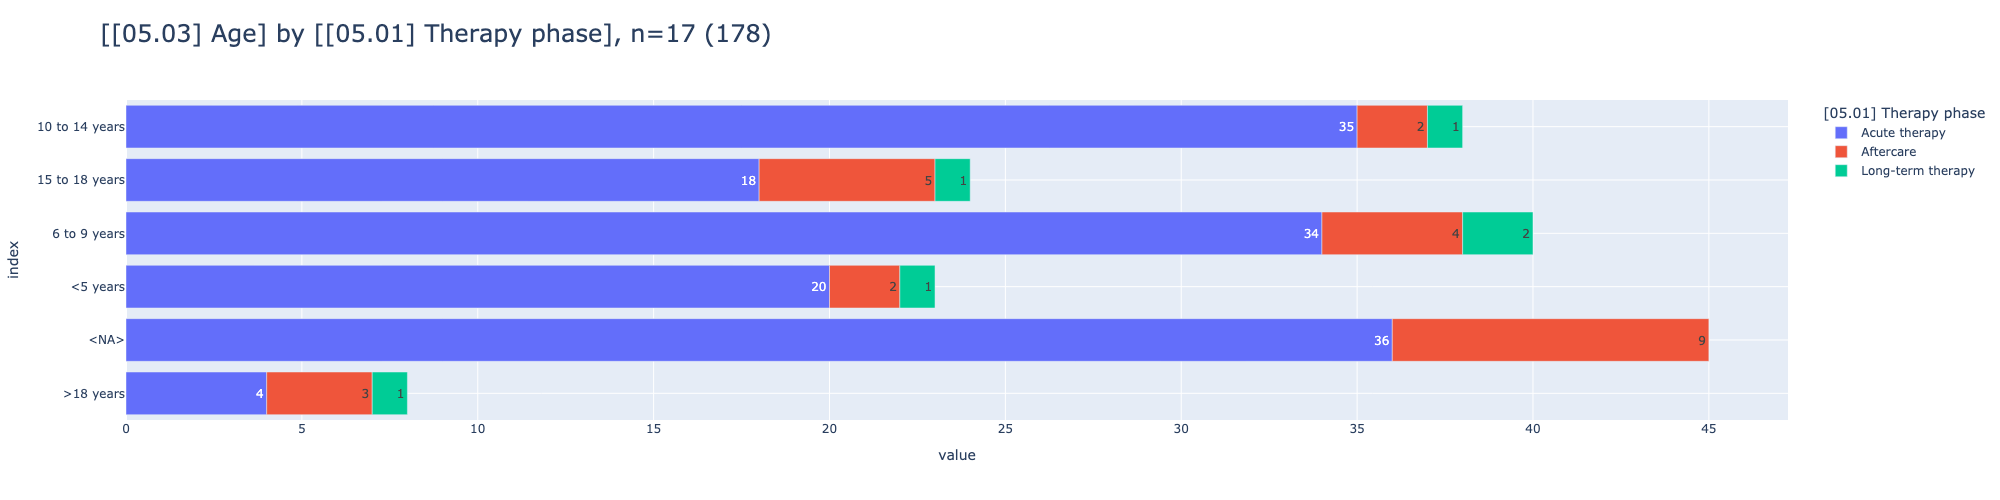

In [26]:
_cols = hlp.find_cols(df_csv_condensed, ["[05.01]", "[05.03]"])
_df = df_csv_condensed[_cols]
_=pls.plot_stacked_bars(
    _df,
    orientation="h",
    swap=True,
    )
